Cel: Analiza wpływu migracji na rynek pracy
* Ocena korelacji pomiędzy poziomem migracji a wskaźnikami zatrudnienia, bezrobocia oraz zatrudnienia w poszczególnych sektorach
* Stworzenie modeli statystycznych oceniających wpływ 
* Wykorzystane zestawy danych z Eurostatu:
    - Employment by citizenship
    - Employment rates by sex, age and citizenship - QUARTERLY & YEARLY
    - Unemployment rates by sex, age and citizenship QUARTERLY & YEARLY
    - Employment by sex, age and economic activity

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Employment rates by sex, age and citizenship quarterly

W analizie biorę pod uwagę: 
* citizenship jako Reporting country/Foreign country/Total
* age -> jedynie 15-64 (w statystyce porównawczej te granice są najczęściej przyjmowane)
* sex -> Females/Males/Total

Wskaźnik zatrudnienia – wskaźnik określający, jaki odsetek ludności w wieku produkcyjnym pracuje zawodowo (jednostka: %)

### Wstępna anliza danych 

In [77]:
e_rate_df = pd.read_csv('../processed_data/employmnet_rates.csv')

In [78]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain"]
df = e_rate_df[e_rate_df['geo'].isin(selected_countries)]

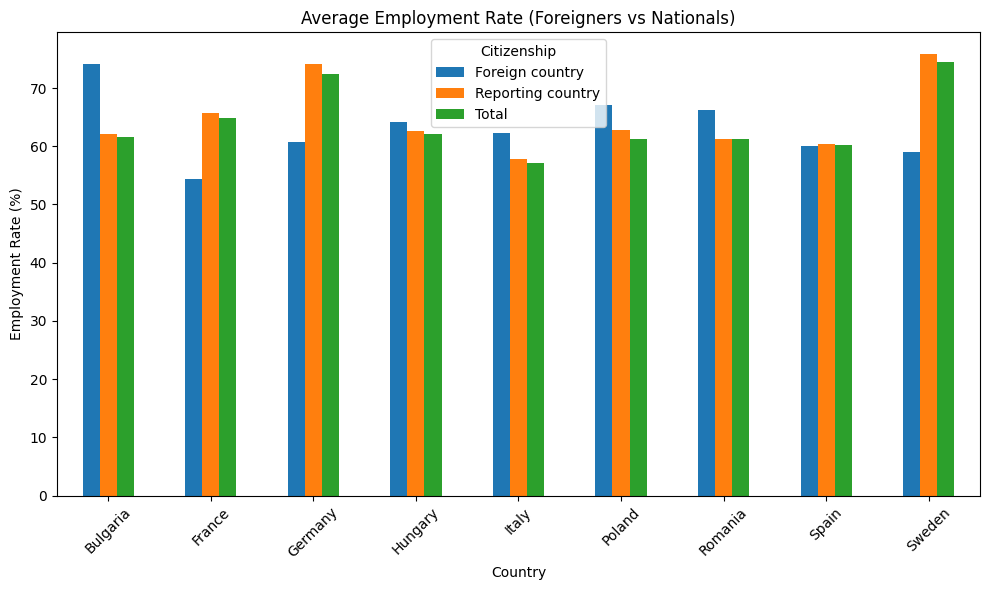

<Figure size 1200x600 with 0 Axes>

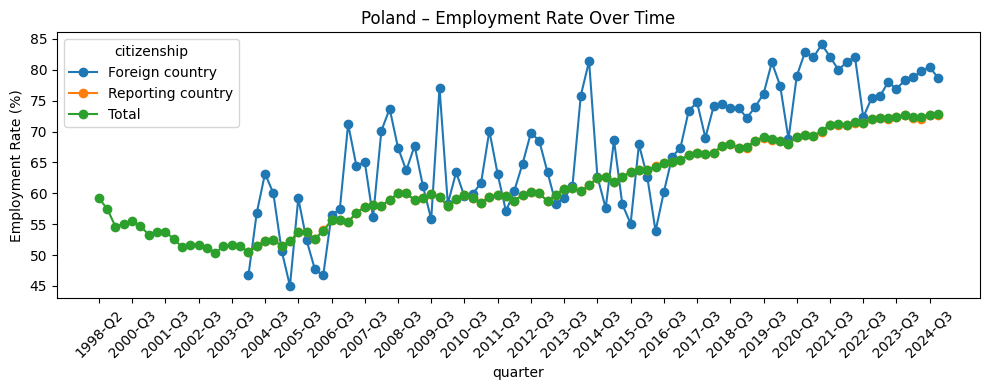

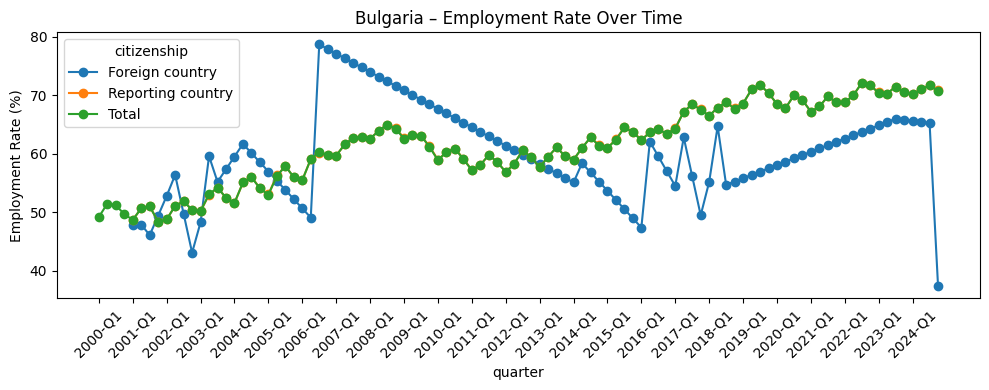

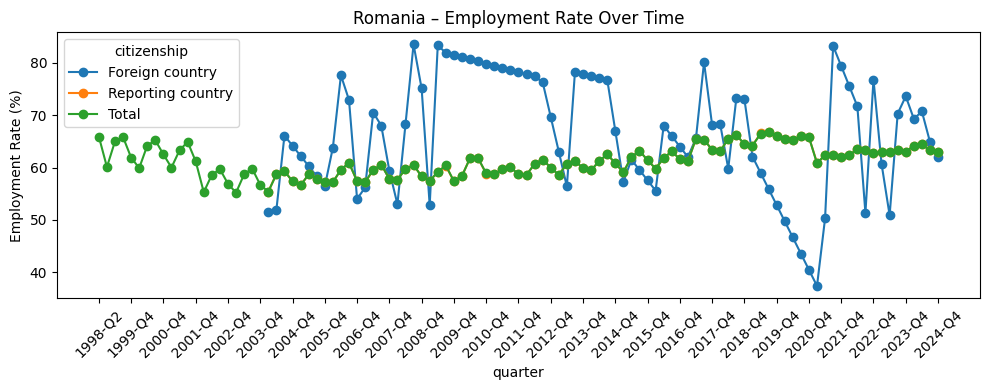

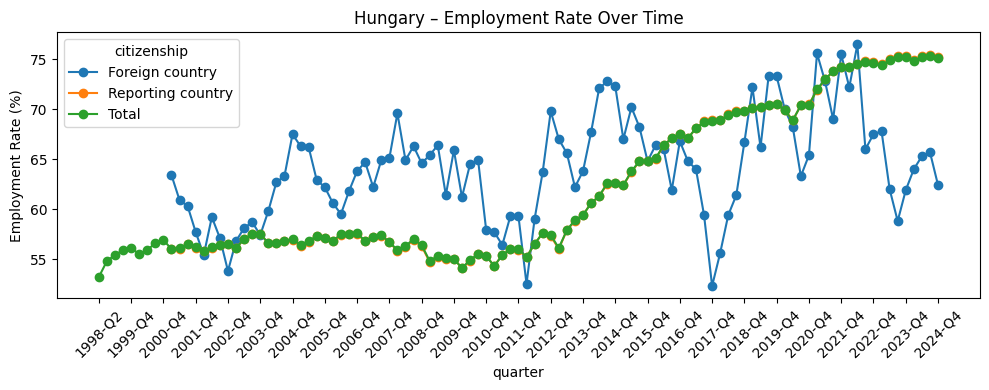

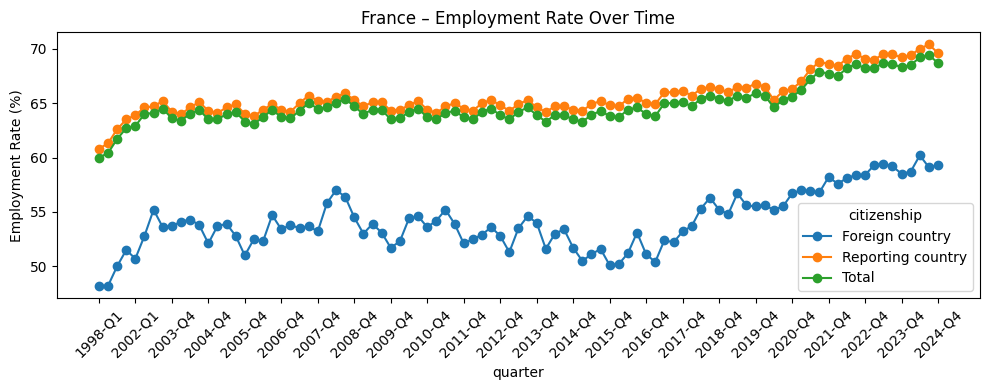

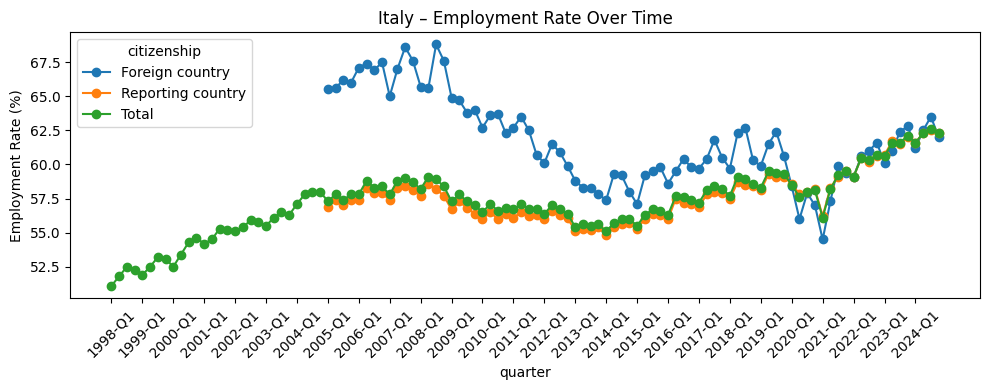

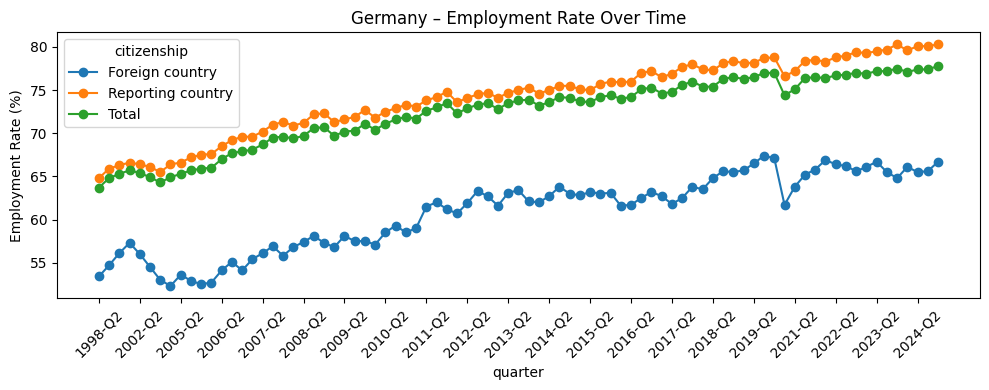

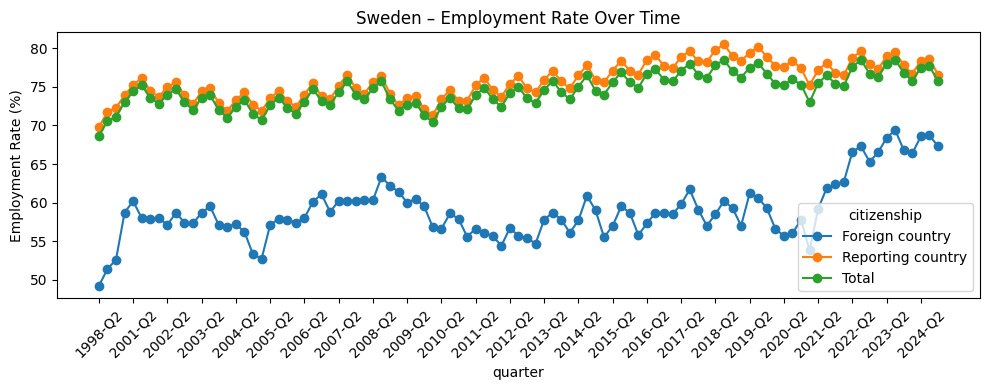

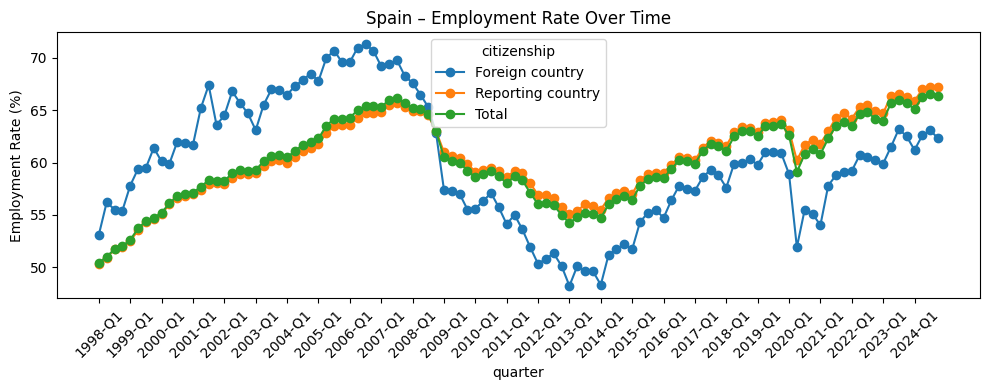

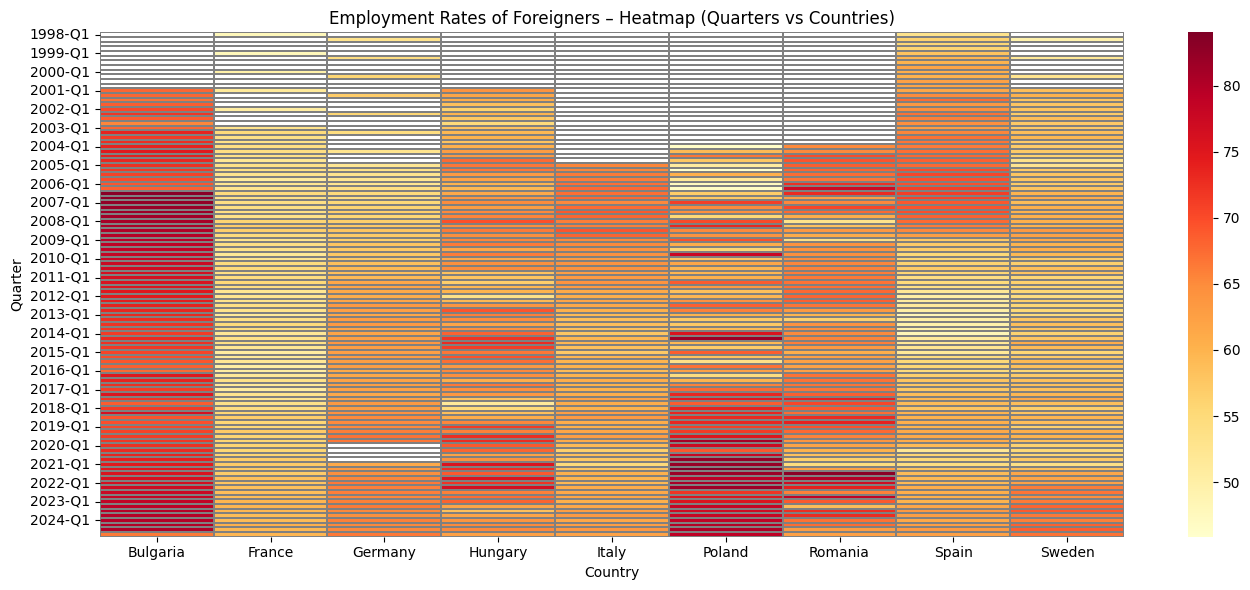

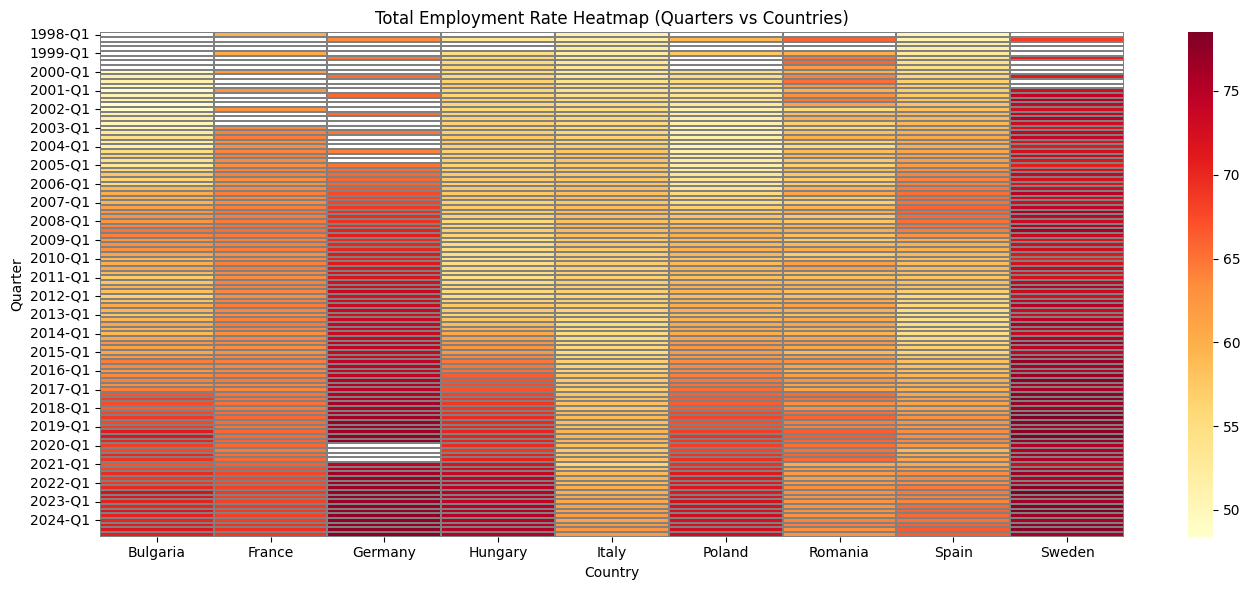

In [79]:
# Average employment rate by citizenship and country
pivot_mean = df.groupby(['geo', 'citizenship'])['employment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Employment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in selected_countries:
    subset = df[(df['geo'] == country) & (df['citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='quarter', columns='citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Employment Rate (%)")
    xticks = subset.index
    plt.xticks(ticks=range(0, len(xticks), 4), labels=xticks[::4], rotation=45)
    plt.tight_layout()
    plt.show()

# Heatmap of foreigner employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Foreign country'].pivot_table(index='quarter', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Employment Rates of Foreigners – Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


# Heatmap of total employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Total'].pivot_table(index='quarter', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Total Employment Rate Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


Wątpliwe długie liniowe fragmenty - dla Bułgarii oraz Rumunii

### Próba analizy dla Bułgarii i Rumunii (foreign citizens) - dane rzeczywiste bez liniowej interpolacji

In [55]:
extra_df = pd.read_csv('../processed_data/employment_and_unemployment_rates_quarter.csv')

In [56]:
countries = ['Bulgaria', 'Romania']
extra_df = extra_df[
    (extra_df['geo'].isin(countries)) & 
    (extra_df['Country of citizenship'] == 'Foreign country')
]

In [57]:
print(len(extra_df[extra_df['employment_rate'] == 0])/len(extra_df)) 

0.3055555555555556


In [58]:
filtered_df = extra_df[extra_df['employment_rate'] > 0]
filtered_df = filtered_df.dropna(subset=['employment_rate'])

<Figure size 1200x600 with 0 Axes>

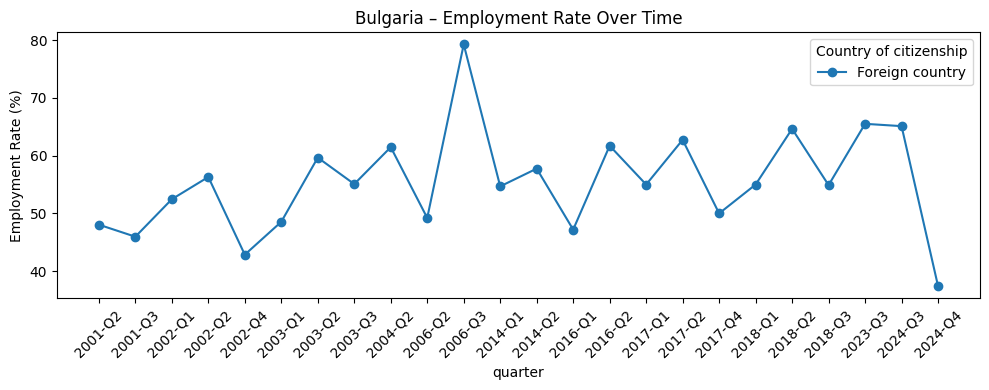

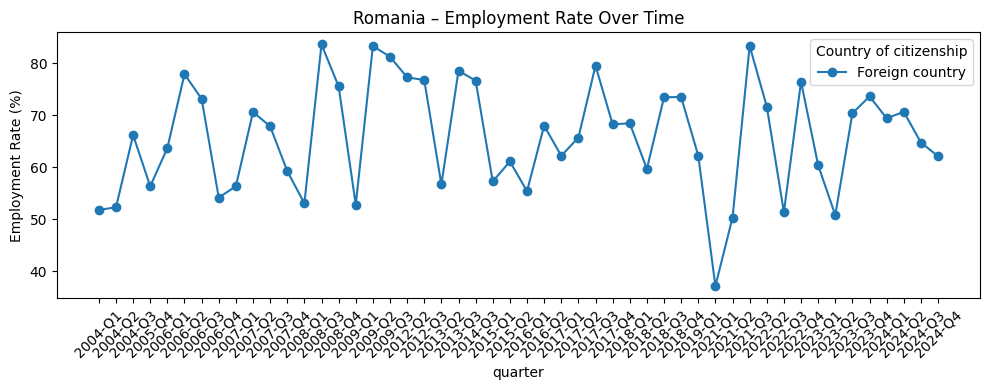

In [59]:
# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in countries:
    subset = filtered_df[(filtered_df['geo'] == country) & (filtered_df['Country of citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (filtered_df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='quarter', columns='Country of citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Employment Rate (%)")
    xticks = subset.index
    plt.xticks(ticks=range(0, len(xticks)), labels=xticks, rotation=45)
    plt.tight_layout()
    plt.show()

Niewiele pomogło, ale coś można odczytywać

Widać znaczny wzrost wskaźnika zatrudnienia w Polsce na przestrzeni lat

Widać braki w danych dla niektórych krajów - Bługarię i Rumunię należy wykluczyć z tej analizy / zastąpić innymi krajami / samodzielnie wyliczyć employment rate (z danych dotyczących employment). Postanowiono sprawdzić Grecję i Słowenię. 

In [60]:
new_countries = ['Greece', 'Slovenia']
# Filter the DataFrame for the new countries
df_extra_countries = e_rate_df[e_rate_df['geo'].isin(new_countries)]


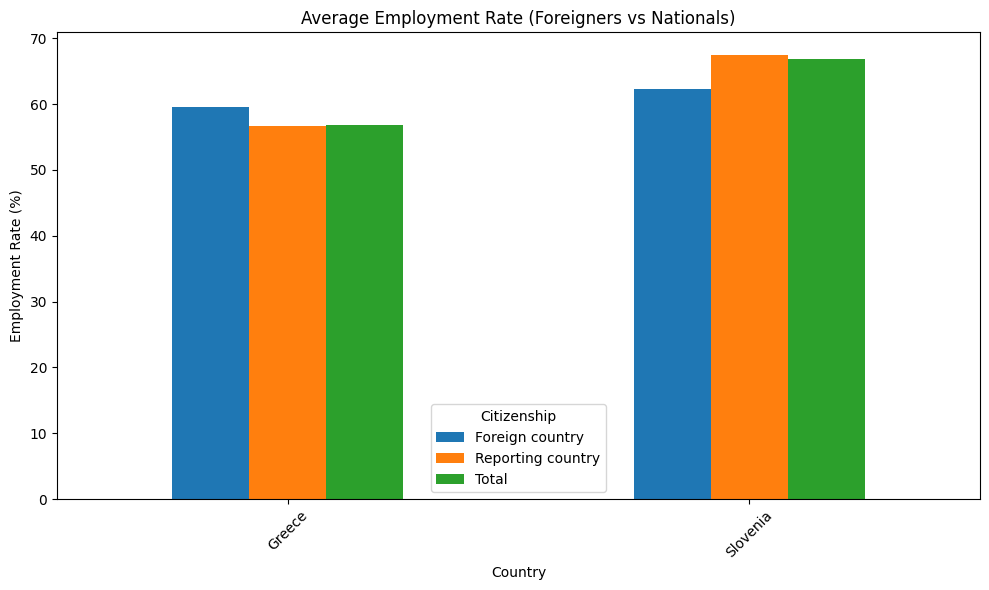

<Figure size 1200x600 with 0 Axes>

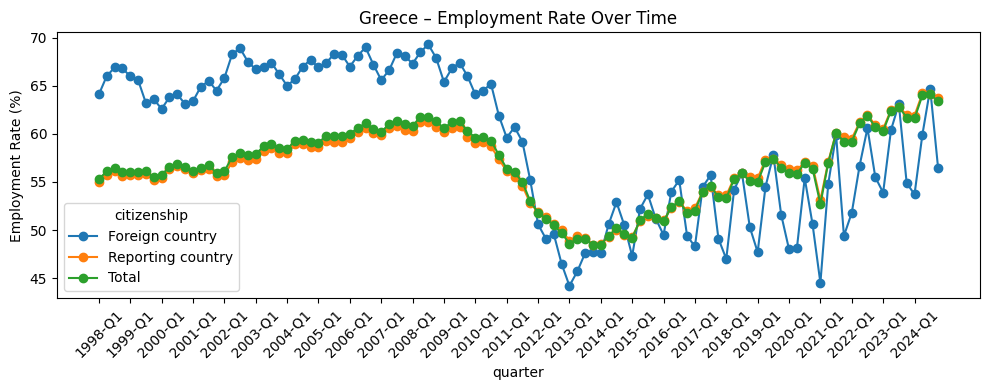

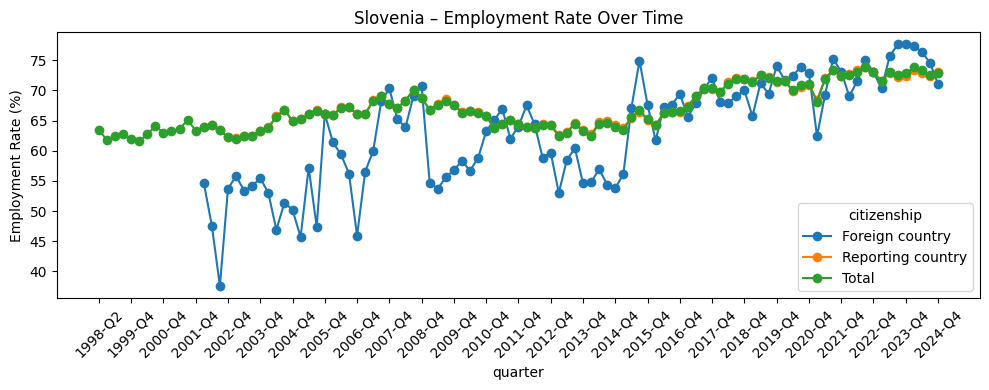

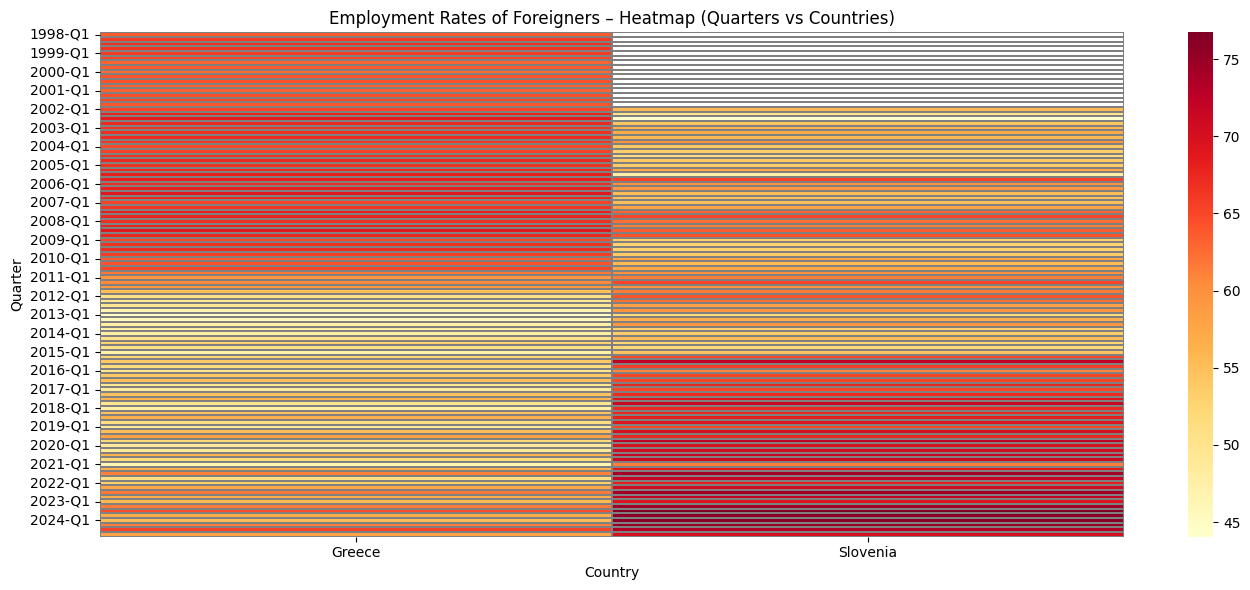

In [61]:
# Average employment rate by citizenship and country
pivot_mean = df_extra_countries.groupby(['geo', 'citizenship'])['employment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Employment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in new_countries:
    subset = df_extra_countries[
        (df_extra_countries['geo'] == country) &
        (df_extra_countries['citizenship'].isin(['Reporting country', 'Foreign country', 'Total'])) &
        (df_extra_countries['Sex'] == 'Total')
    ]
    subset = subset.pivot_table(index='quarter', columns='citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Employment Rate (%)")
    xticks = subset.index
    plt.xticks(ticks=range(0, len(xticks), 4), labels=xticks[::4], rotation=45)
    plt.tight_layout()
    plt.show()


# Heatmap of foreigner employment rates by country and quarter
heatmap_data = df_extra_countries[df_extra_countries['citizenship'] == 'Foreign country'].pivot_table(
    index='quarter', columns='geo', values='employment_rate'
)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Employment Rates of Foreigners – Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


### Analiza związana z płcią


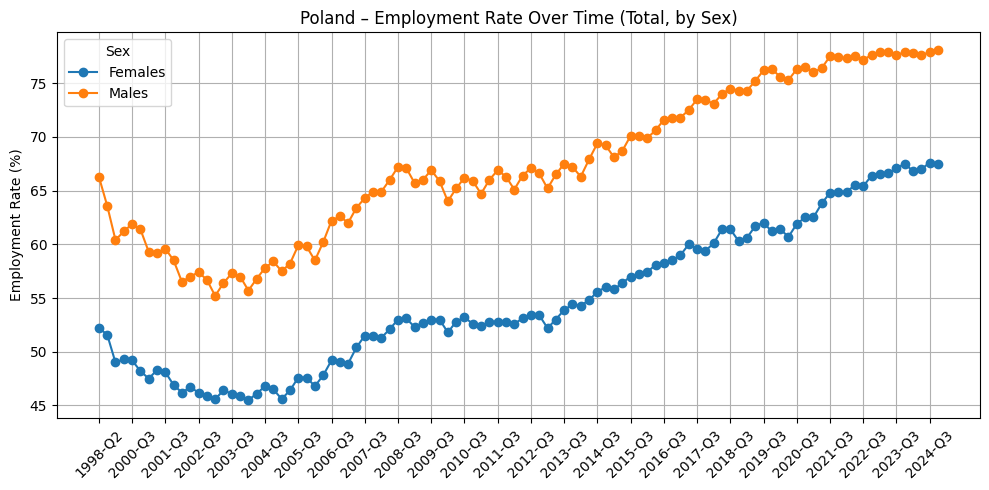

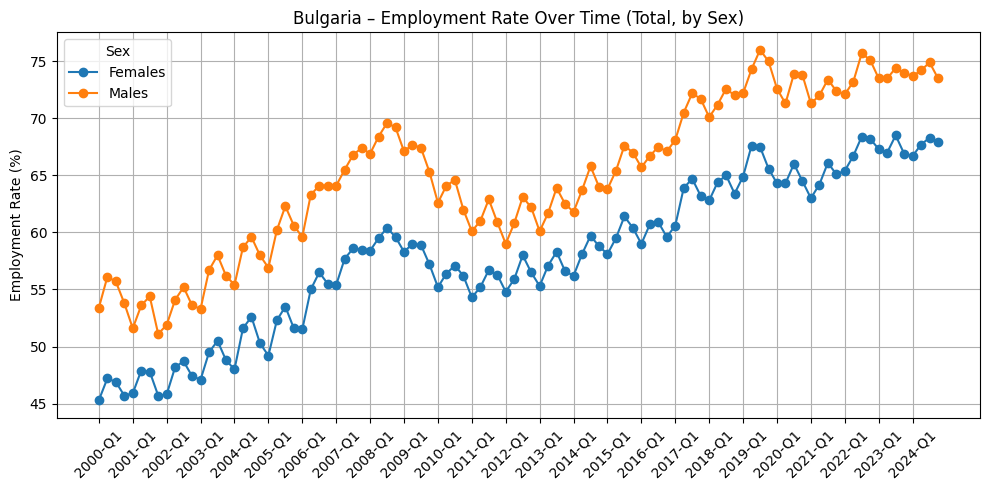

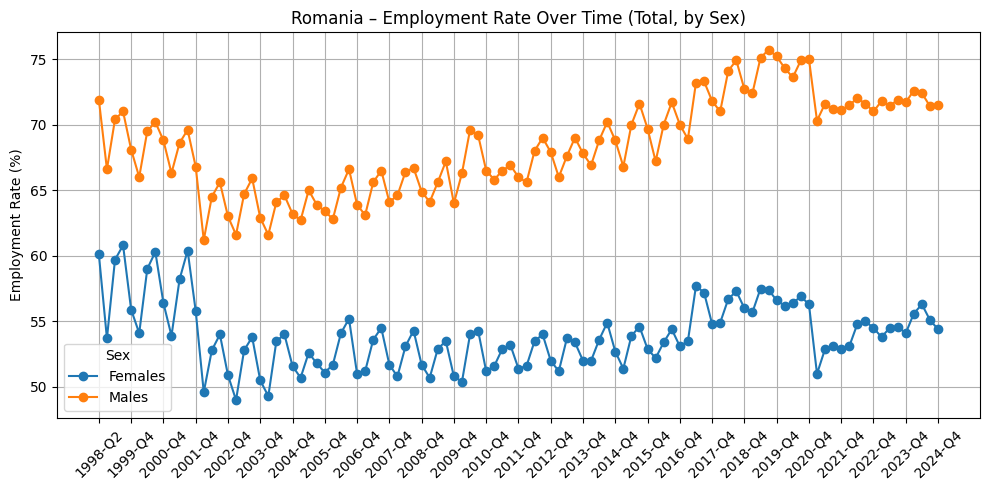

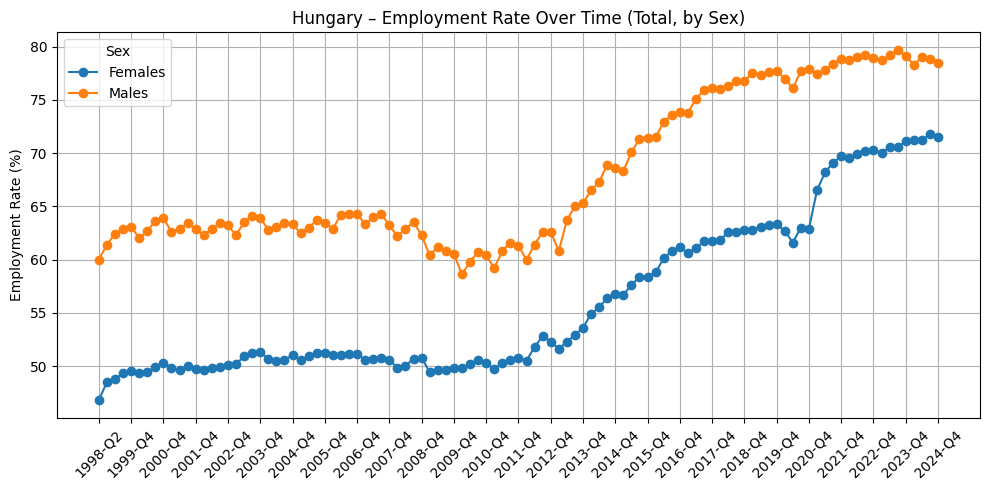

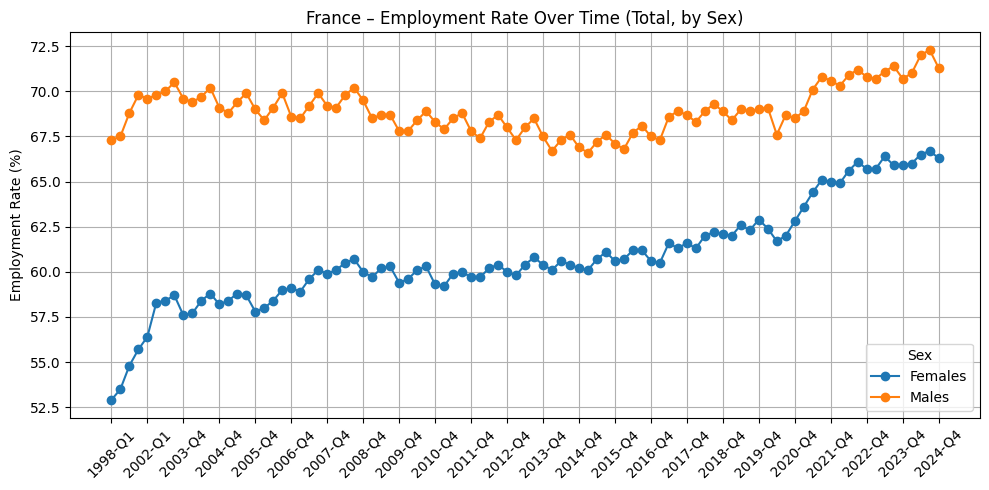

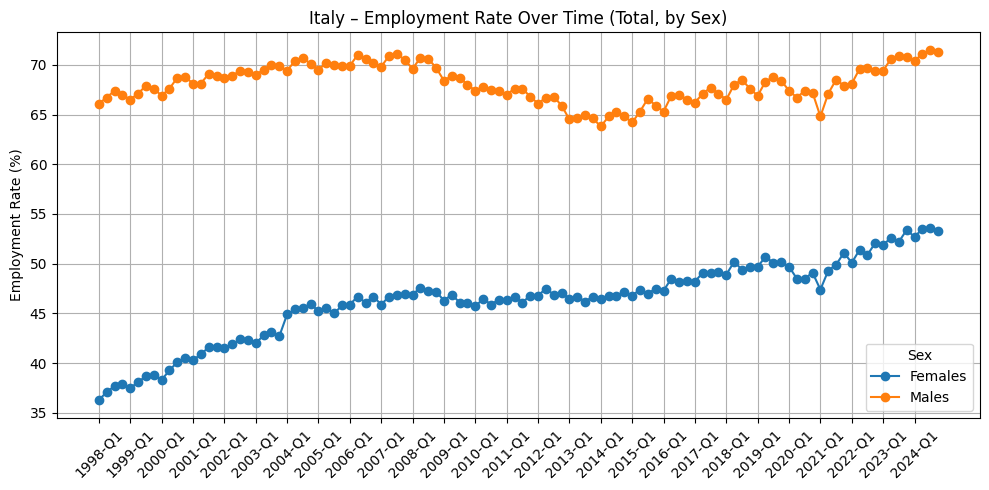

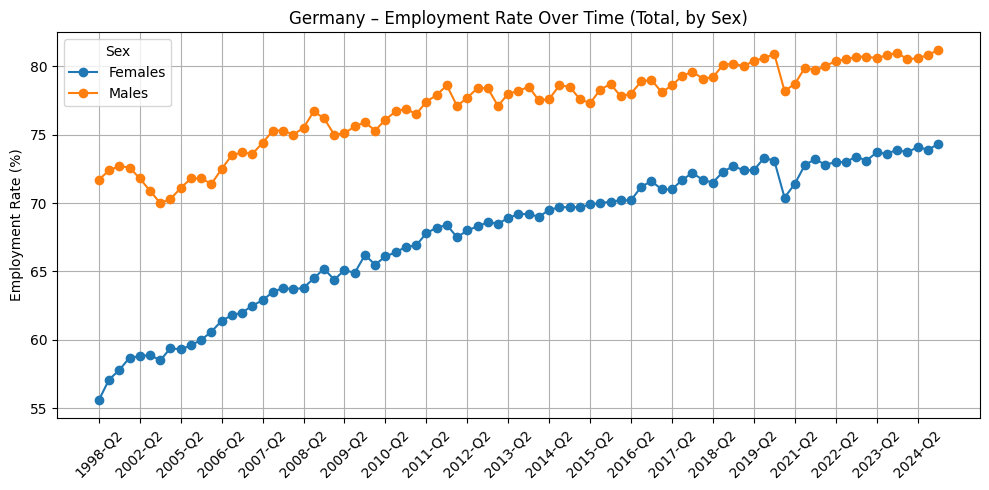

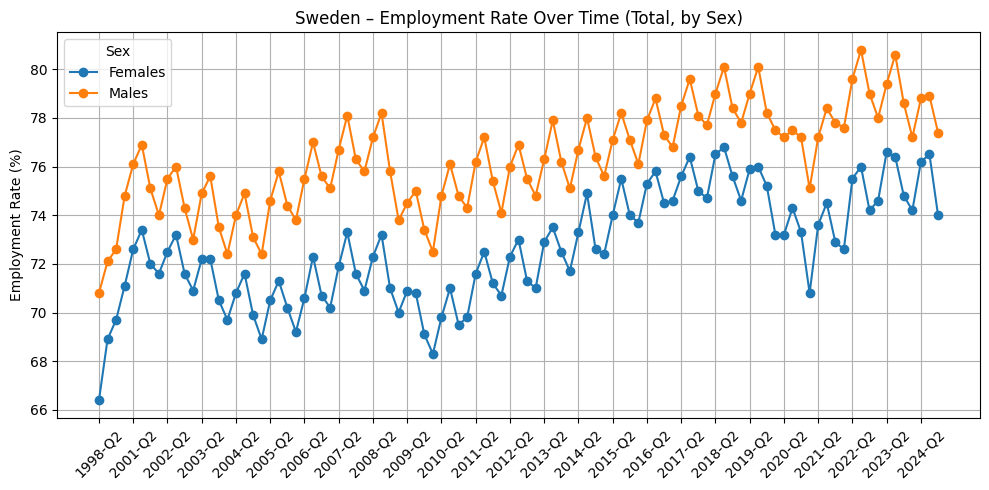

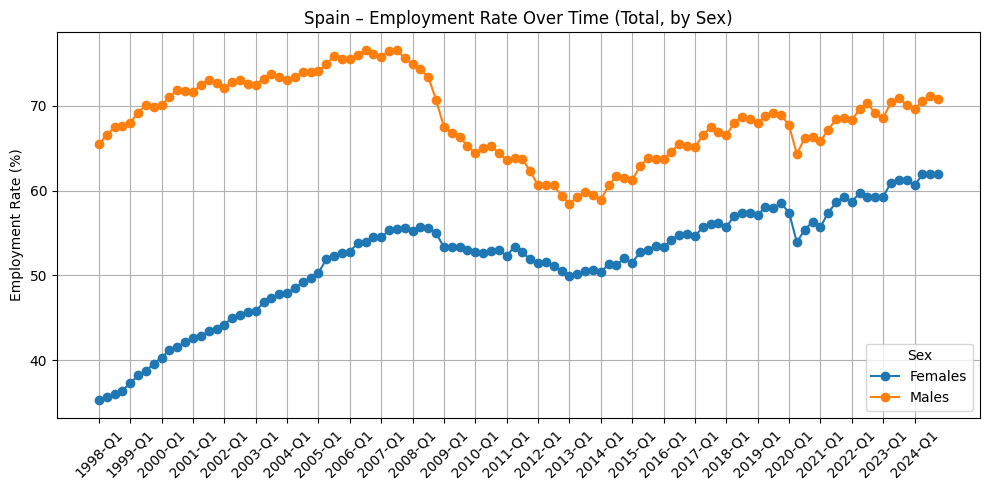

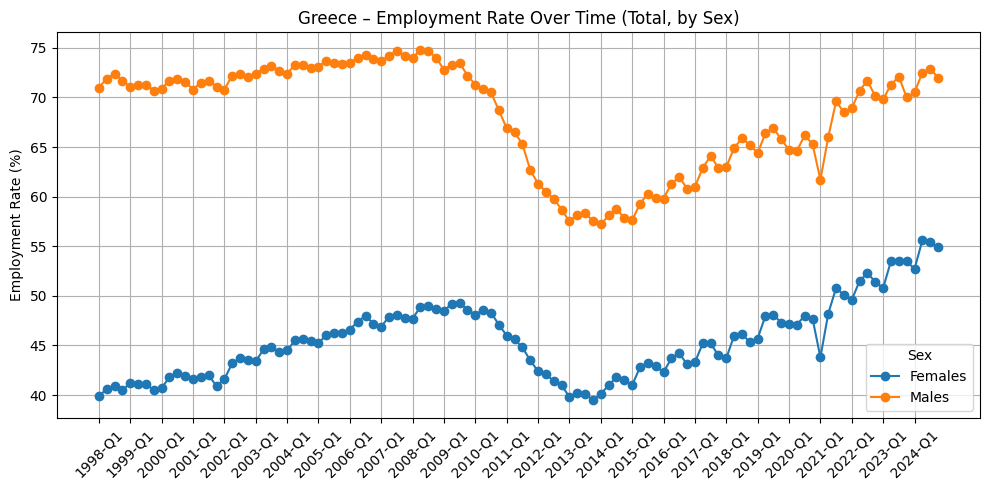

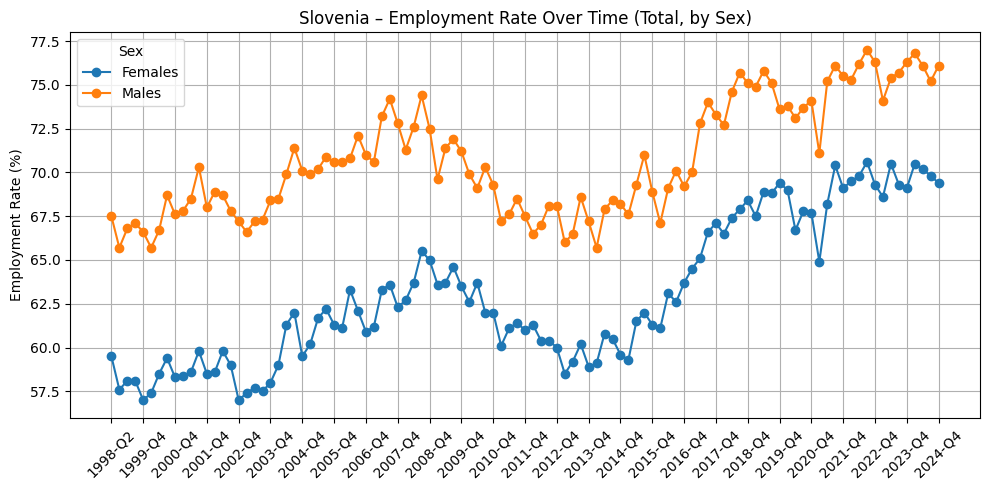

In [62]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]

df = e_rate_df[
    (e_rate_df['geo'].isin(selected_countries)) &
    (e_rate_df['Sex'].isin(['Females', 'Males'])) &
    (e_rate_df['citizenship'] == 'Total')
]

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values(by='quarter')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Total, by Sex)")
    plt.ylabel("Employment Rate (%)")


    xticks = subset['quarter'].sort_values().unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


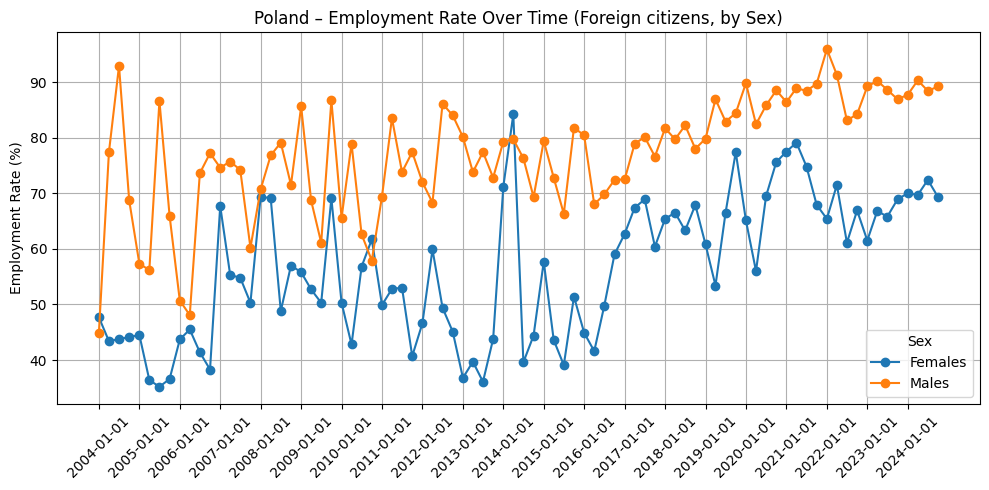

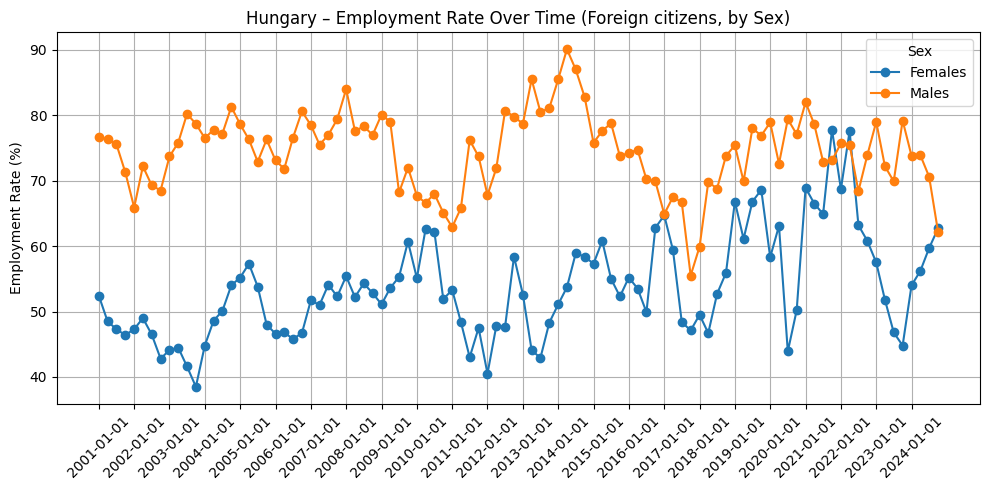

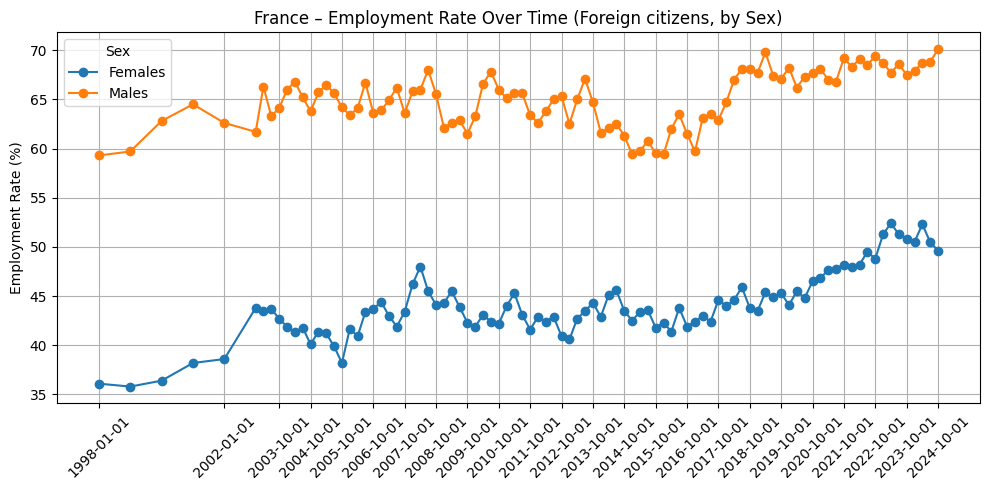

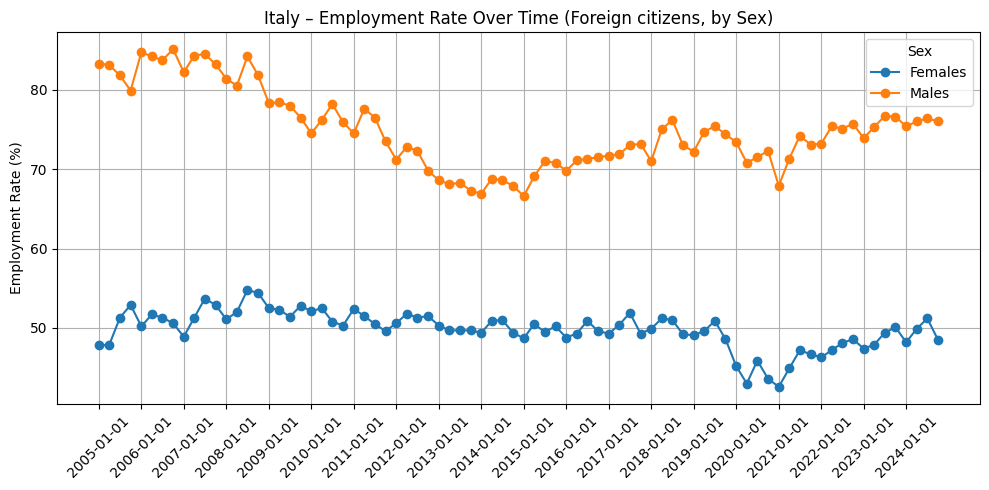

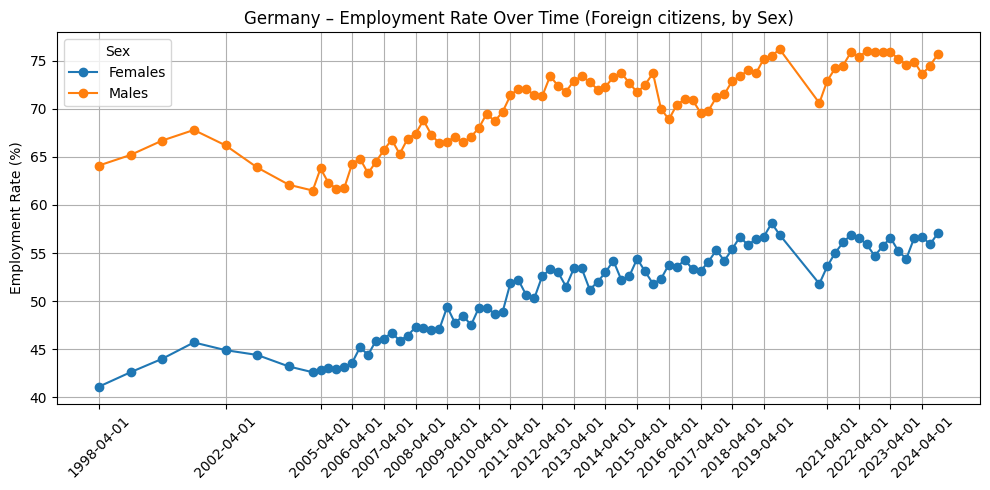

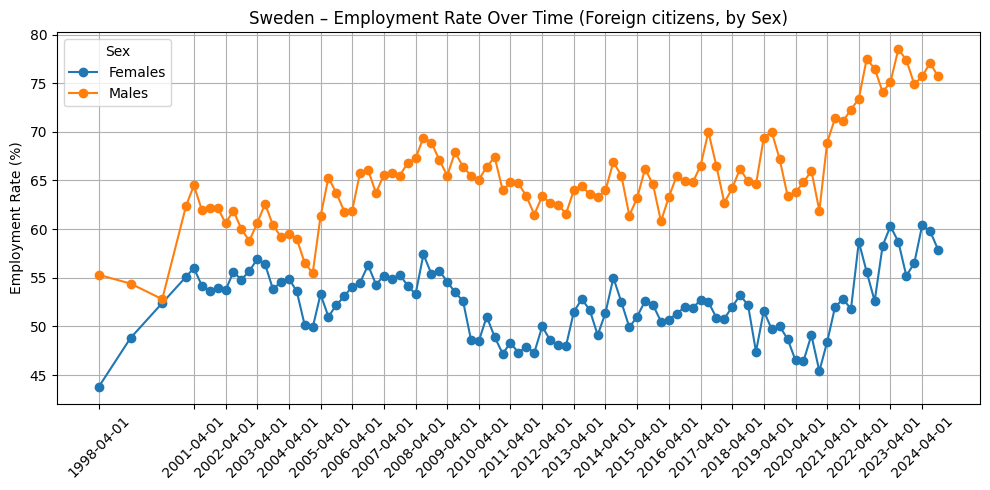

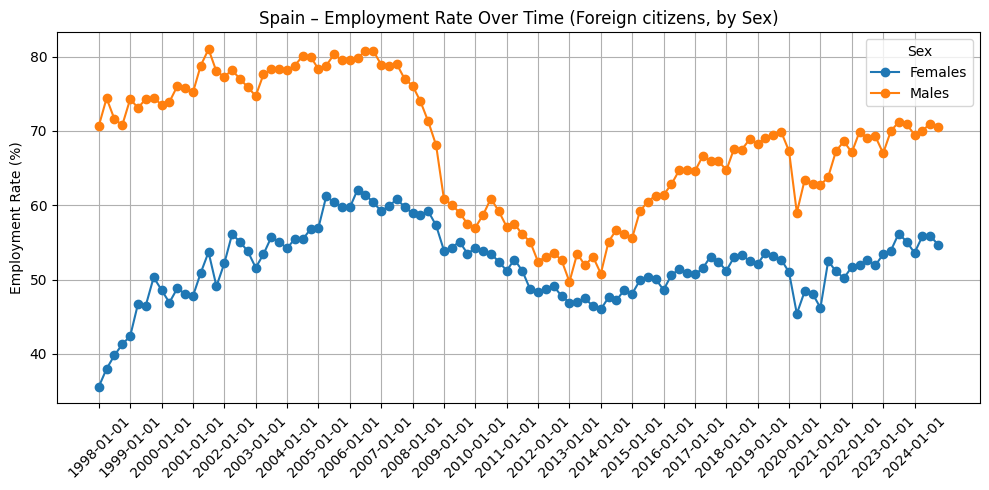

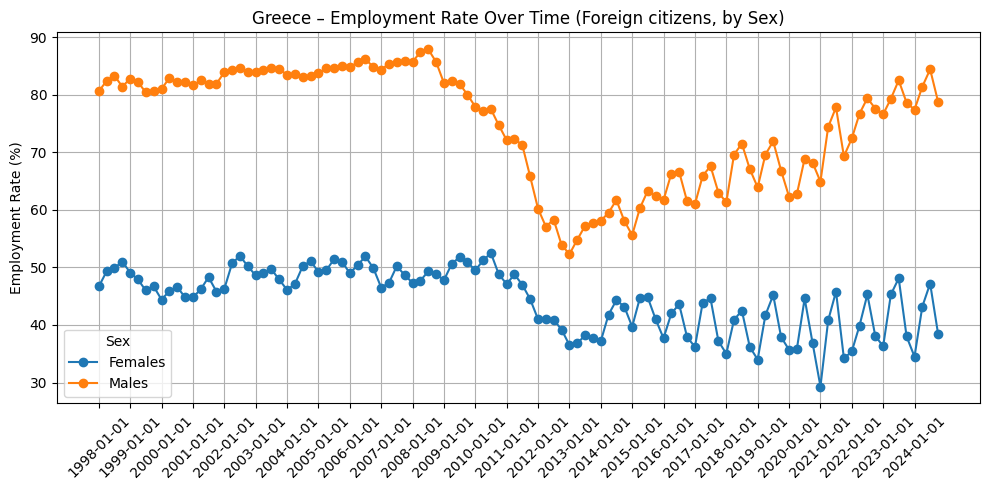

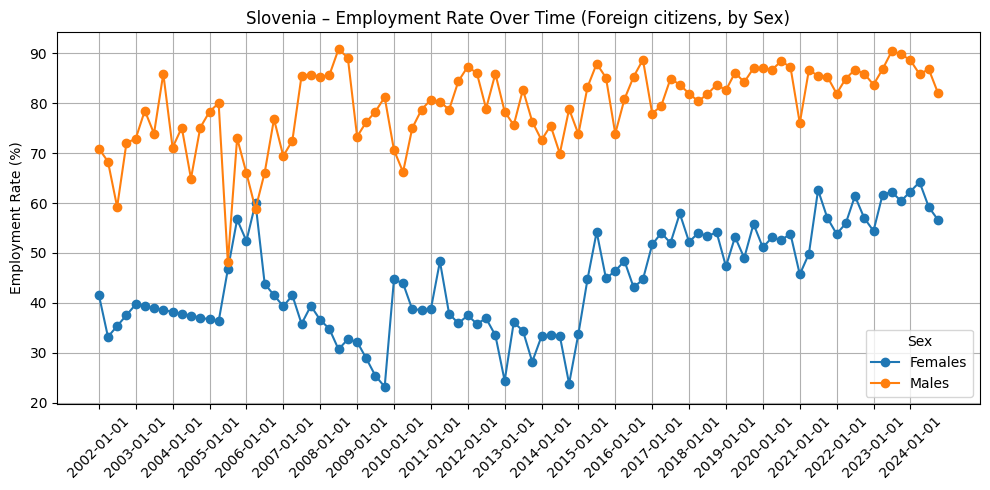

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

selected_countries = ["Poland", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]


df = e_rate_df[
    (e_rate_df['geo'].isin(selected_countries)) &
    (e_rate_df['Sex'].isin(['Females', 'Males'])) &
    (e_rate_df['citizenship'] == 'Foreign country')
].copy()

def quarter_to_datetime(q):
    year, qtr = q[:4], q[-1]
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}.get(qtr, '01')
    return pd.to_datetime(f"{year}-{month}-01")

df['quarter_dt'] = df['quarter'].apply(quarter_to_datetime)

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values('quarter_dt')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter_dt'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Foreign citizens, by Sex)")
    plt.ylabel("Employment Rate (%)")

    xticks = subset['quarter_dt'].unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


# Unemployment rates by sex, age and citizenship quarterly

# 

In [64]:
ue_rate_df = pd.read_csv('../processed_data/unemploymnet_rates.csv')

In [65]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain"]
df = ue_rate_df[ue_rate_df['geo'].isin(selected_countries)]

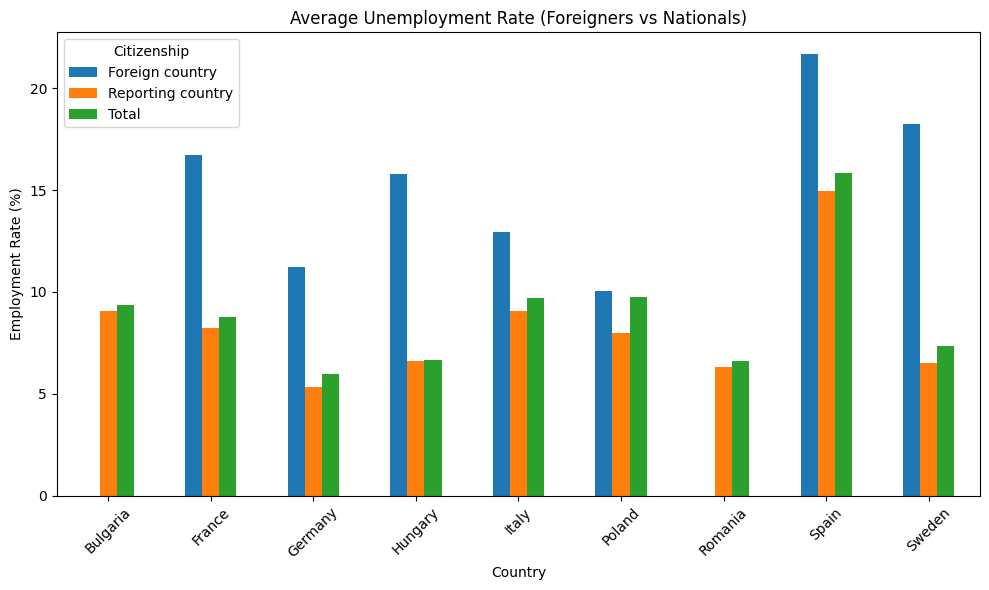

<Figure size 1200x600 with 0 Axes>

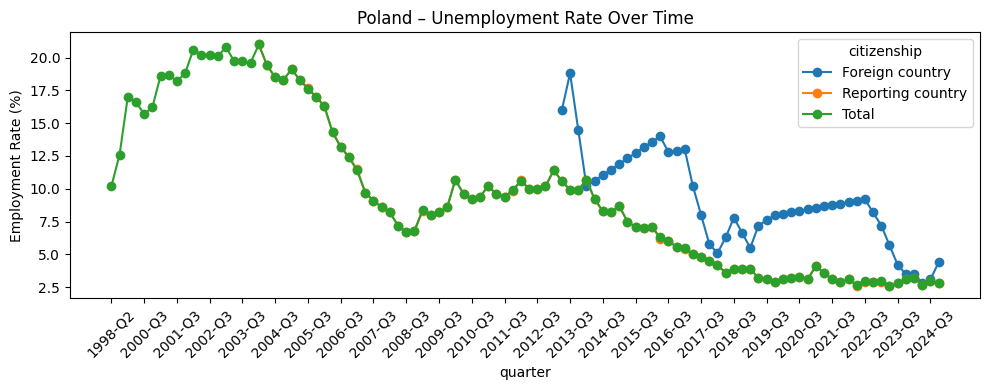

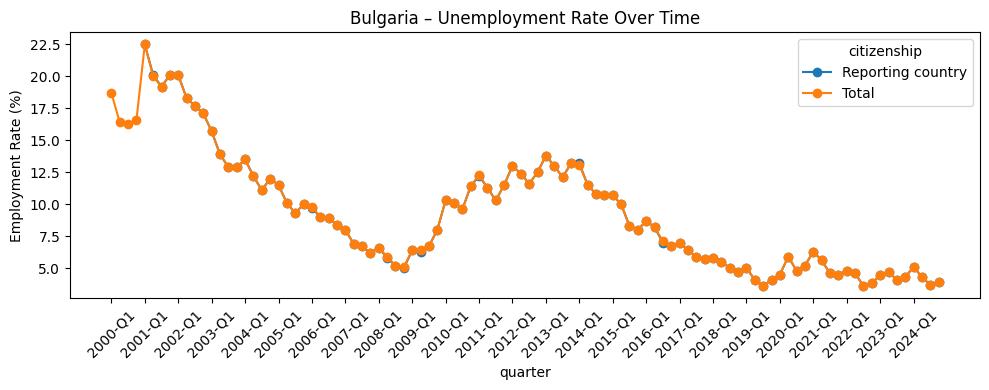

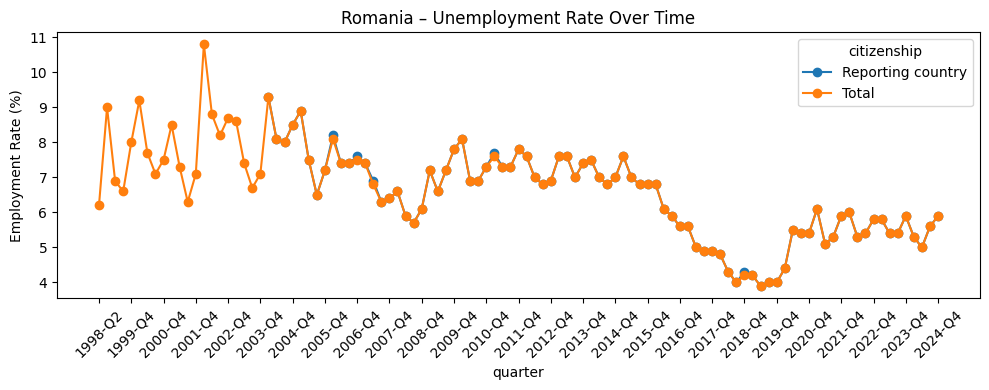

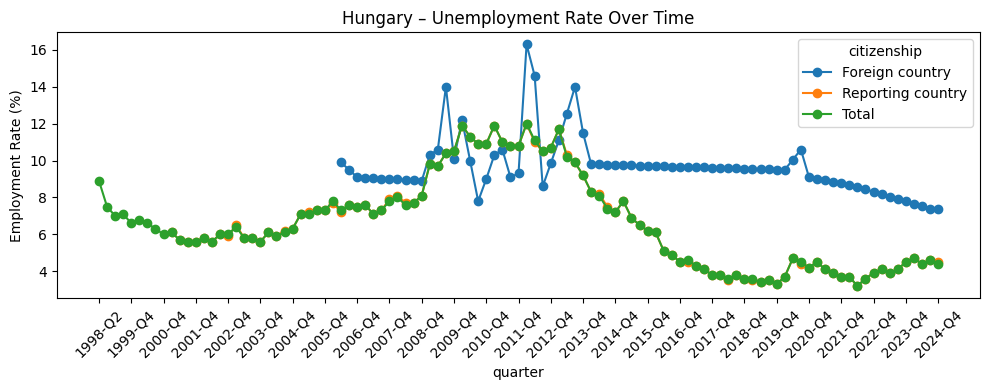

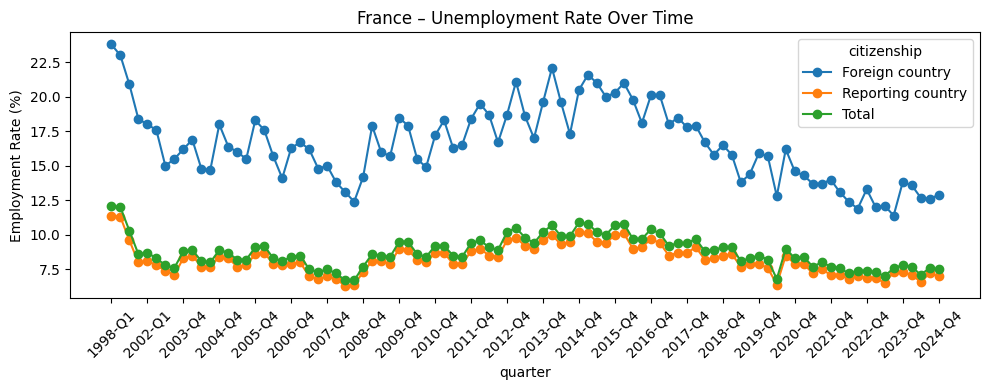

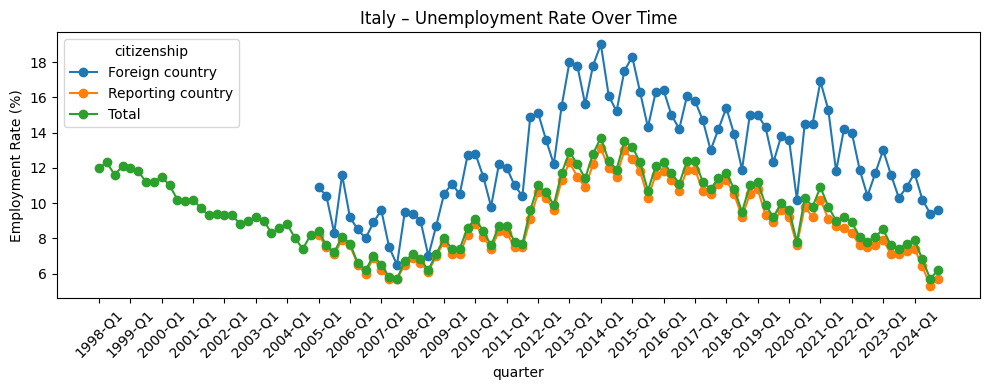

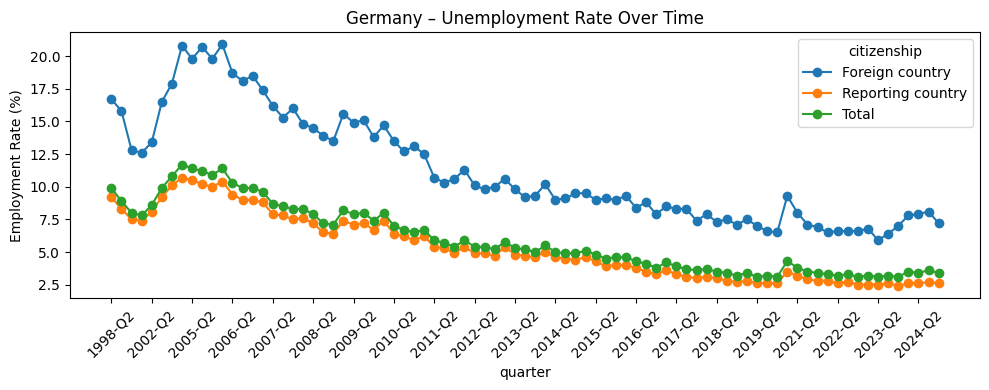

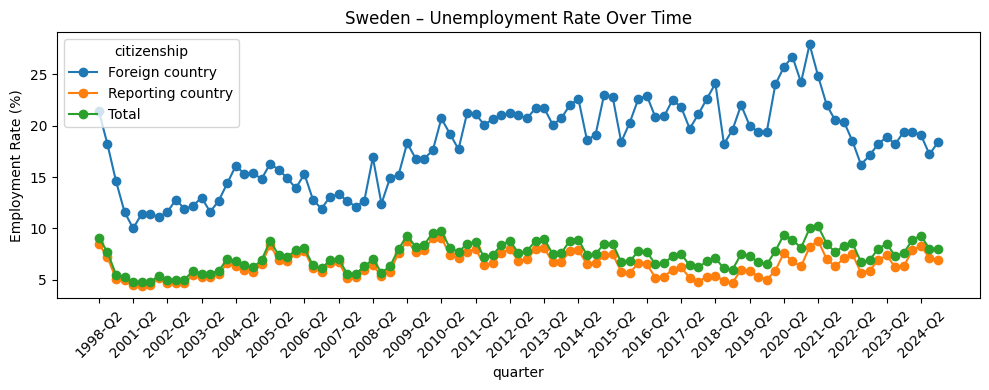

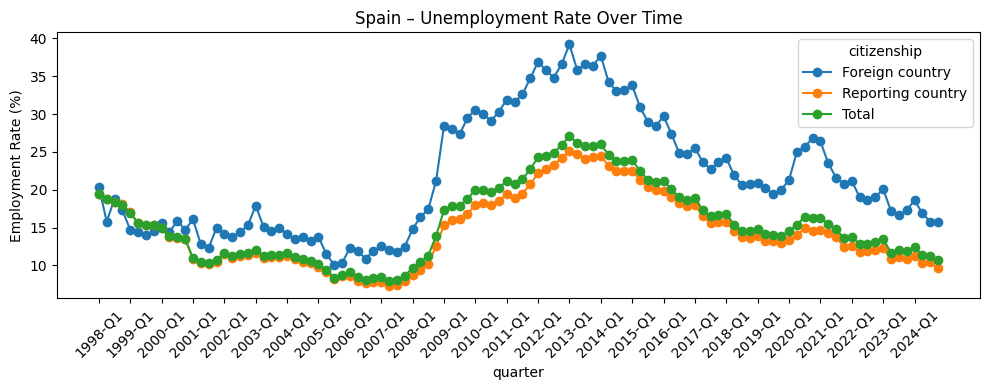

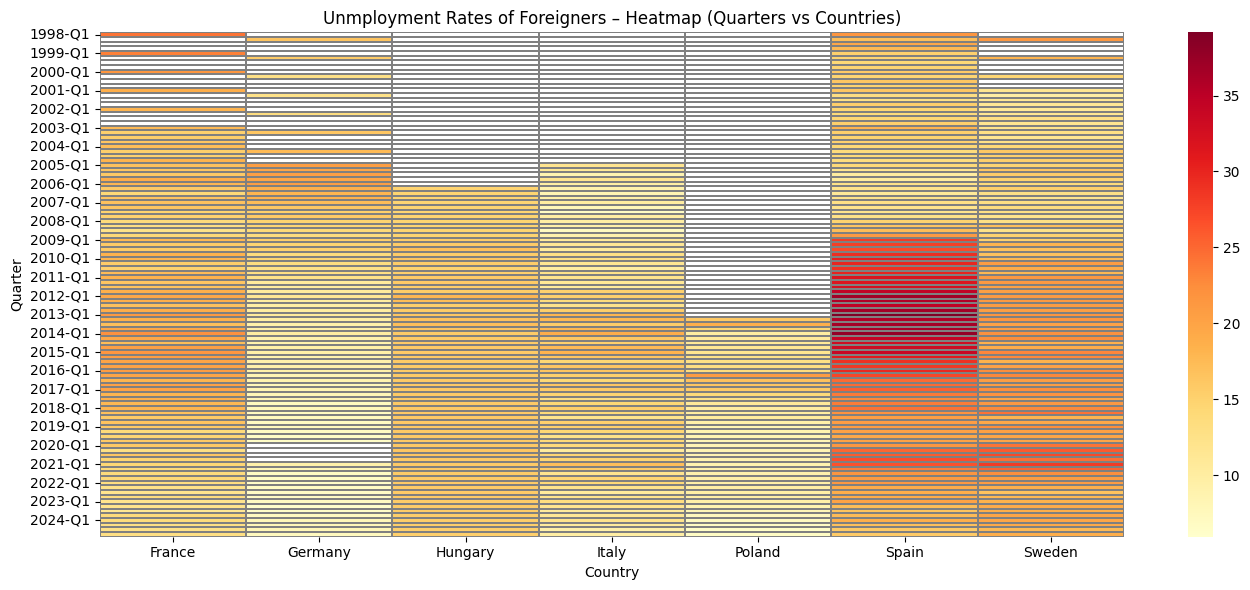

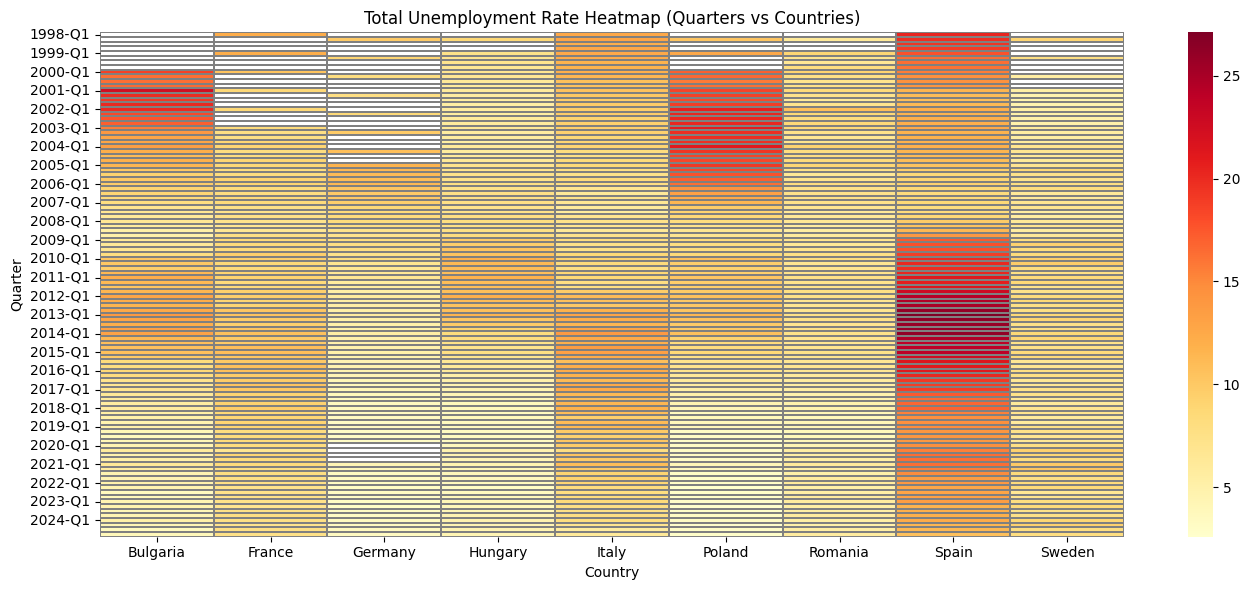

In [66]:
# Average unemployment rate by citizenship and country
pivot_mean = df.groupby(['geo', 'citizenship'])['unemployment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Unemployment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in selected_countries:
    subset = df[(df['geo'] == country) & (df['citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='quarter', columns='citizenship', values='unemployment_rate')
    subset.plot(title=f"{country} – Unemployment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Employment Rate (%)")
    xticks = subset.index
    plt.xticks(ticks=range(0, len(xticks), 4), labels=xticks[::4], rotation=45)
    plt.tight_layout()
    plt.show()
import seaborn as sns
# Heatmap of foreigner unemployment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Foreign country'].pivot_table(index='quarter', columns='geo', values='unemployment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Unmployment Rates of Foreigners – Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


# Heatmap of total employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Total'].pivot_table(index='quarter', columns='geo', values='unemployment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Total Unemployment Rate Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


### Próba analizy dla krajów z dużymi brakami - Polska, Węgry, Bułgaria, Rumunia

0.8611111111111112


<Figure size 1200x600 with 0 Axes>

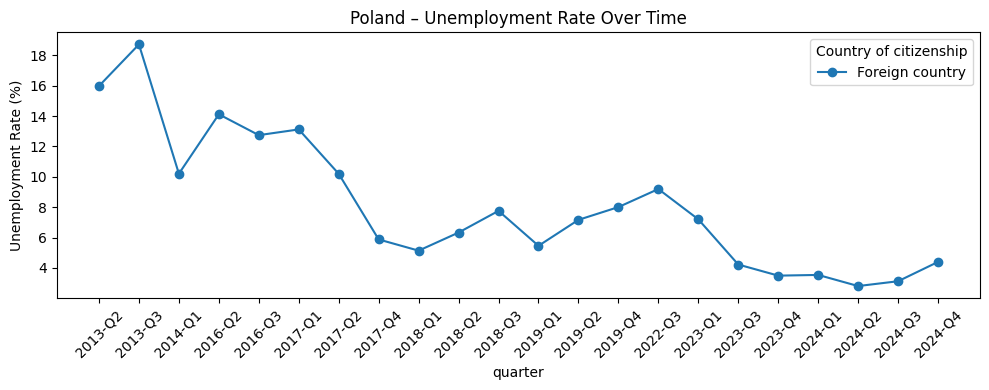

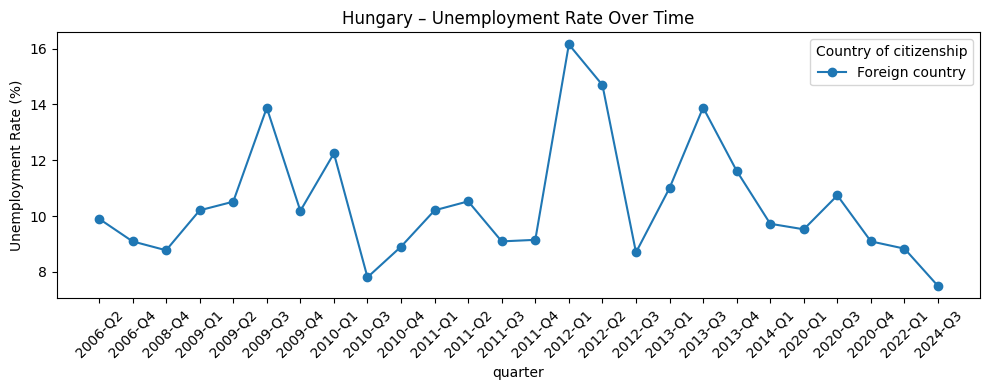

In [67]:
extra_df = pd.read_csv('../processed_data/employment_and_unemployment_rates_quarter.csv')

countries = ['Poland', 'Hungary']
extra_df = extra_df[
    (extra_df['geo'].isin(countries)) & 
    (extra_df['Country of citizenship'] == 'Foreign country')
]

print(len(extra_df[extra_df['unemployment_rate'] == 0])/len(extra_df)) 

filtered_df = extra_df[extra_df['unemployment_rate'] > 0]
filtered_df = filtered_df.dropna(subset=['unemployment_rate'])


# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in countries:
    subset = filtered_df[(filtered_df['geo'] == country) & (filtered_df['Country of citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (filtered_df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='quarter', columns='Country of citizenship', values='unemployment_rate')
    subset.plot(title=f"{country} – Unemployment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Unemployment Rate (%)")
    xticks = subset.index
    plt.xticks(ticks=range(0, len(xticks)), labels=xticks, rotation=45)
    plt.tight_layout()
    plt.show()

Dla Bułgarii i Rumunii - brak tego typu danych kwartalnych

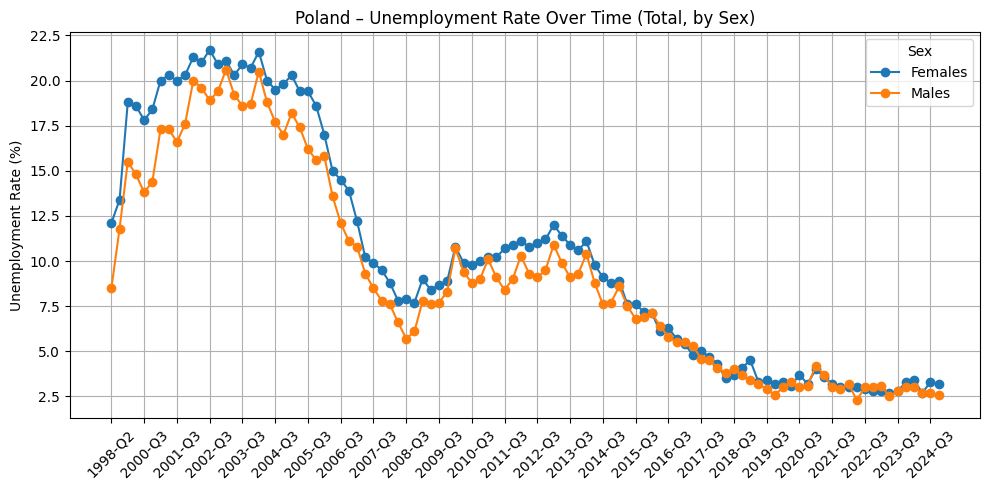

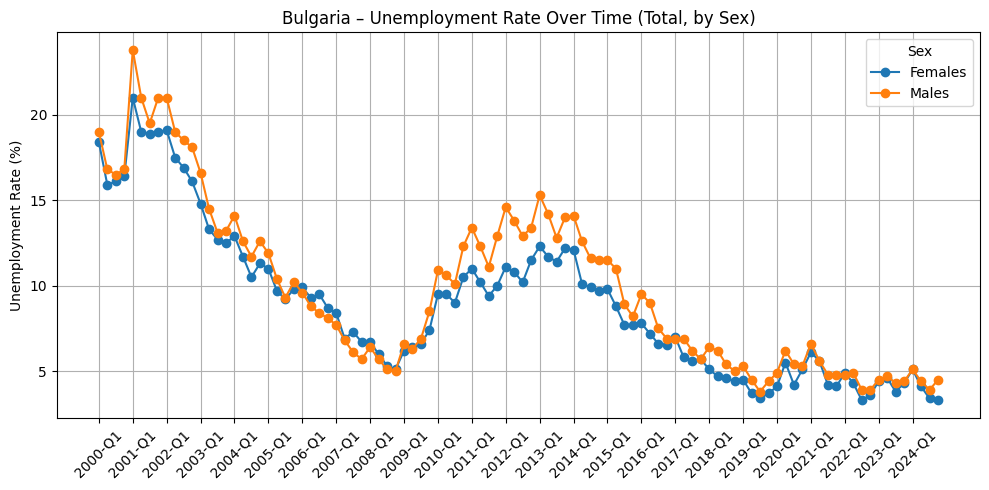

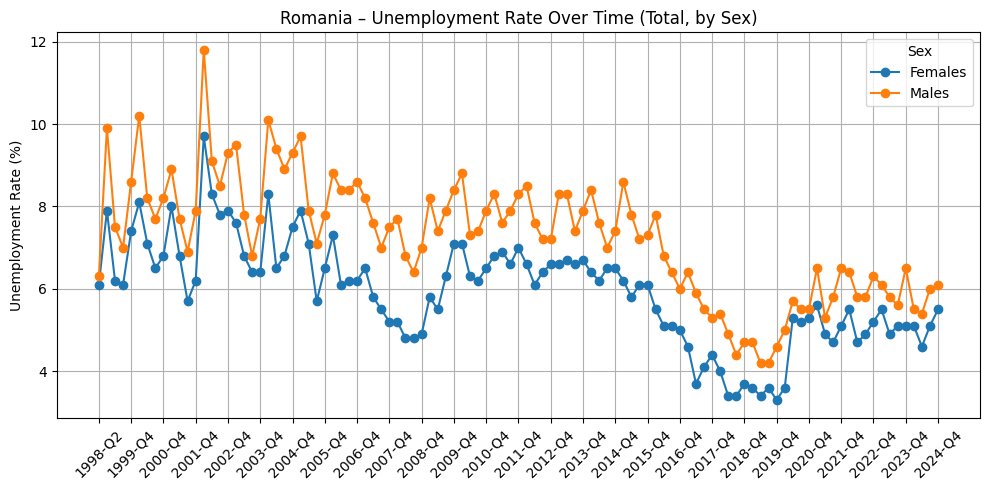

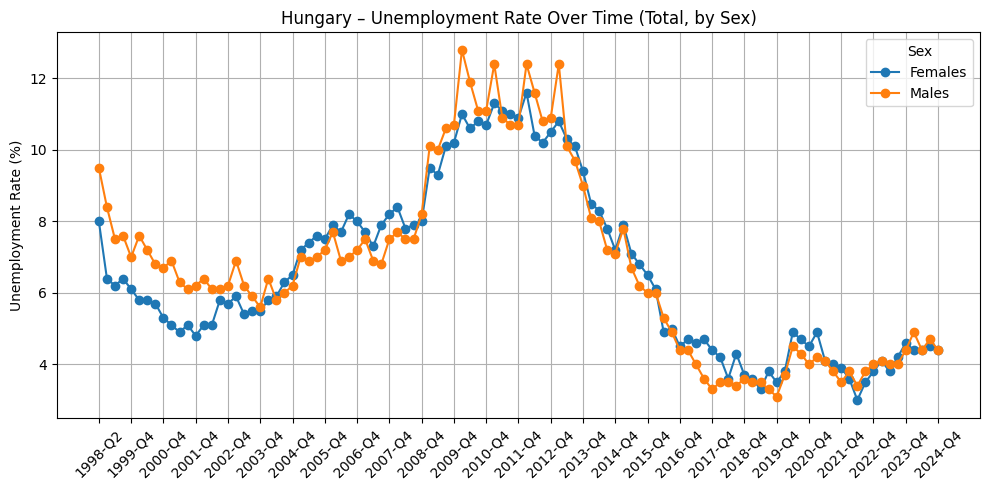

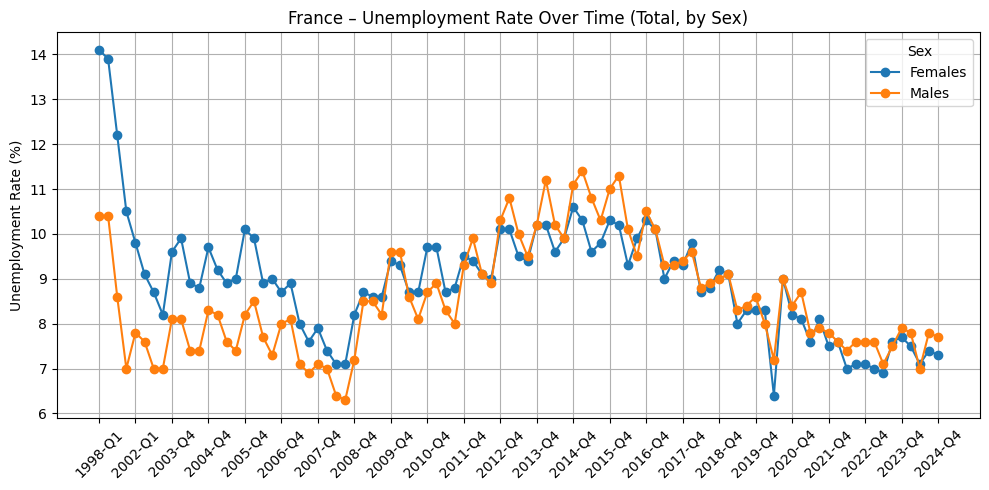

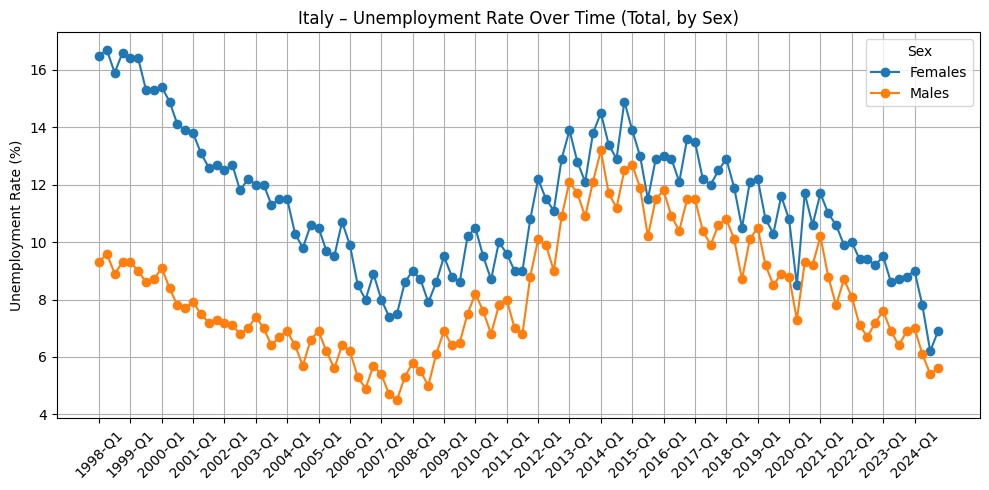

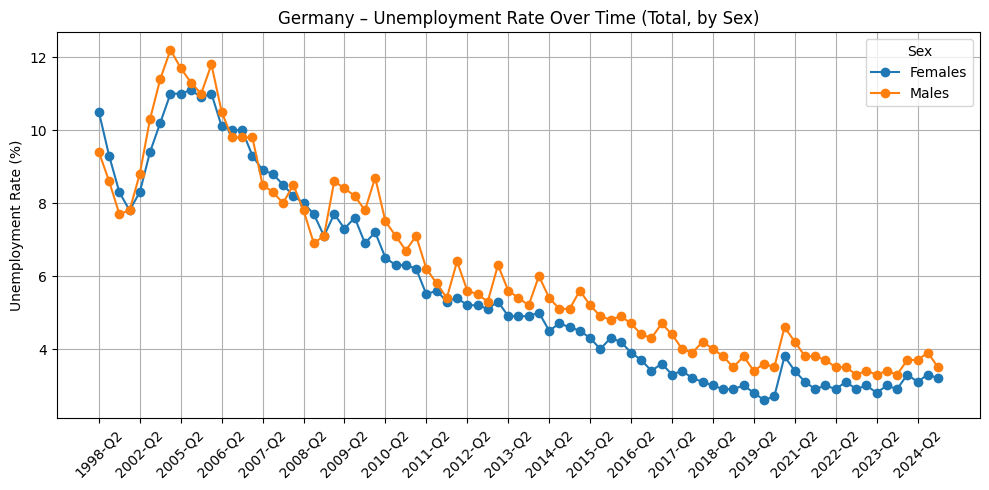

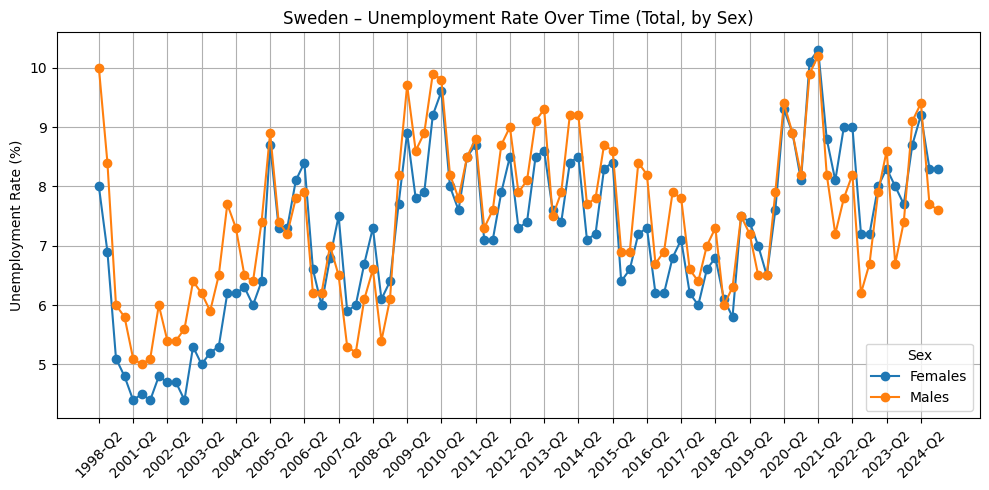

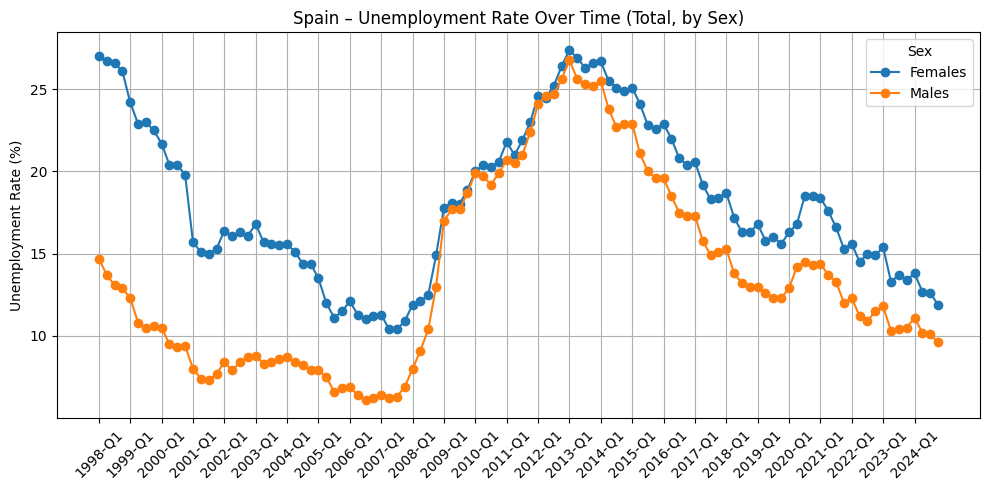

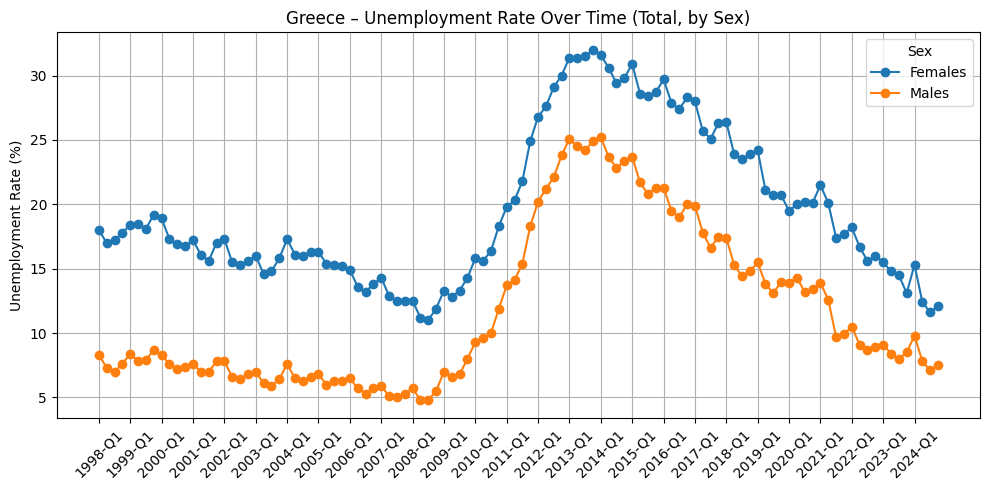

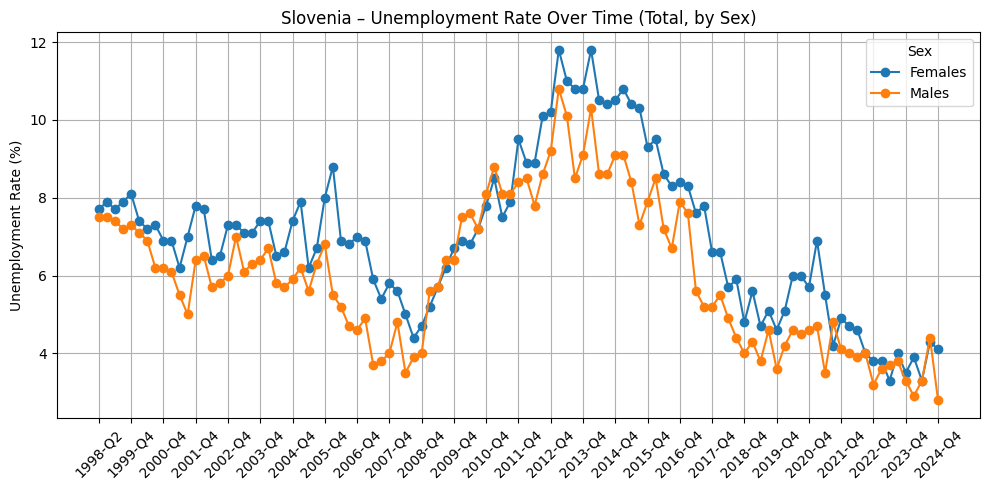

In [68]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]

df = ue_rate_df[
    (ue_rate_df['geo'].isin(selected_countries)) &
    (ue_rate_df['Sex'].isin(['Females', 'Males'])) &
    (ue_rate_df['citizenship'] == 'Total')
]

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values(by='quarter')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter'], sex_data['unemployment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Unemployment Rate Over Time (Total, by Sex)")
    plt.ylabel("Unemployment Rate (%)")


    xticks = subset['quarter'].sort_values().unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


W przypadku stopy bez robocia nie ma znaczących różnic pomiędzy kobietami, a mężczyznami

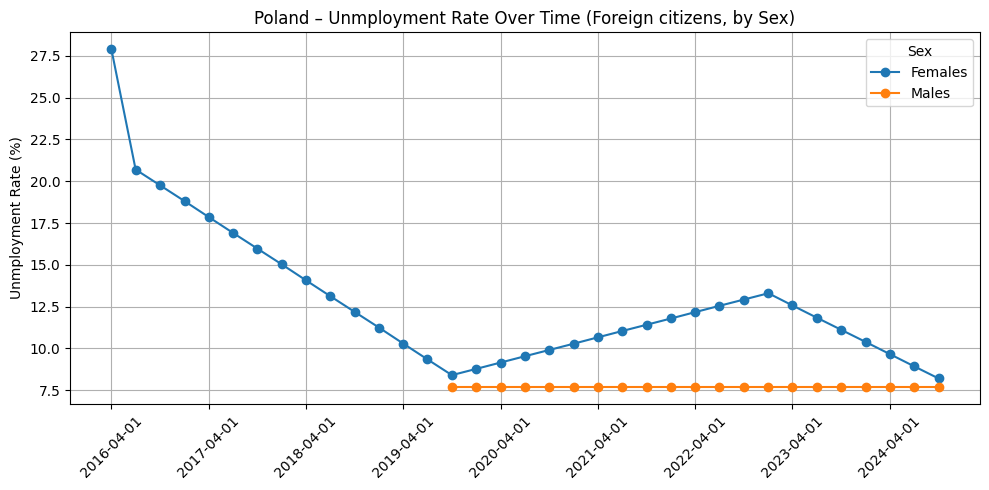

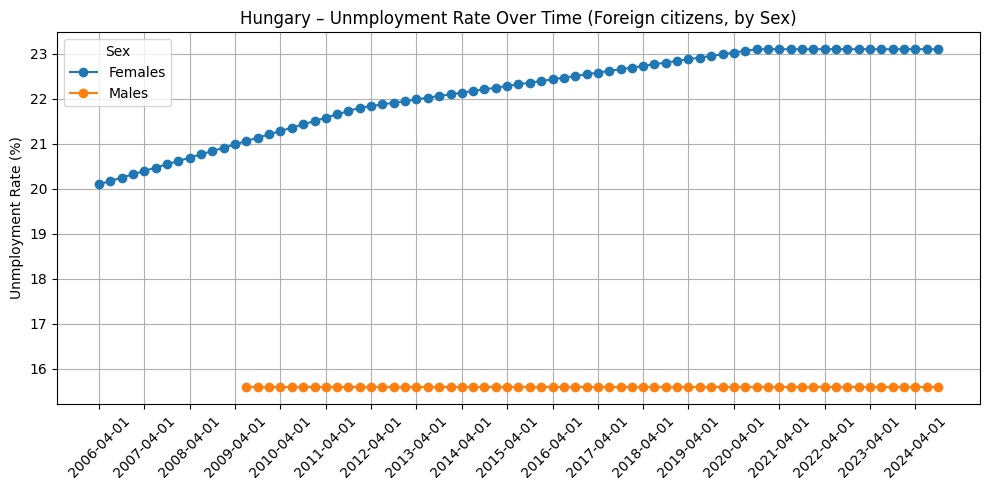

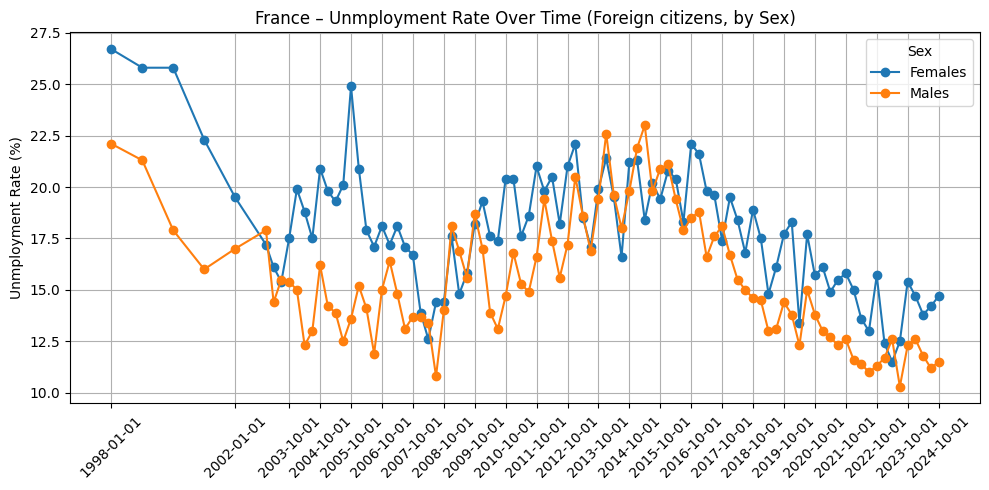

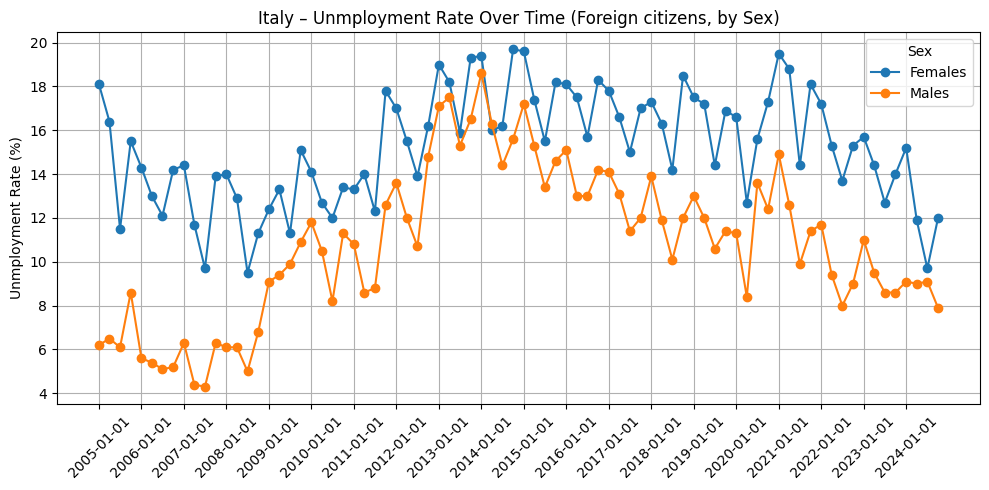

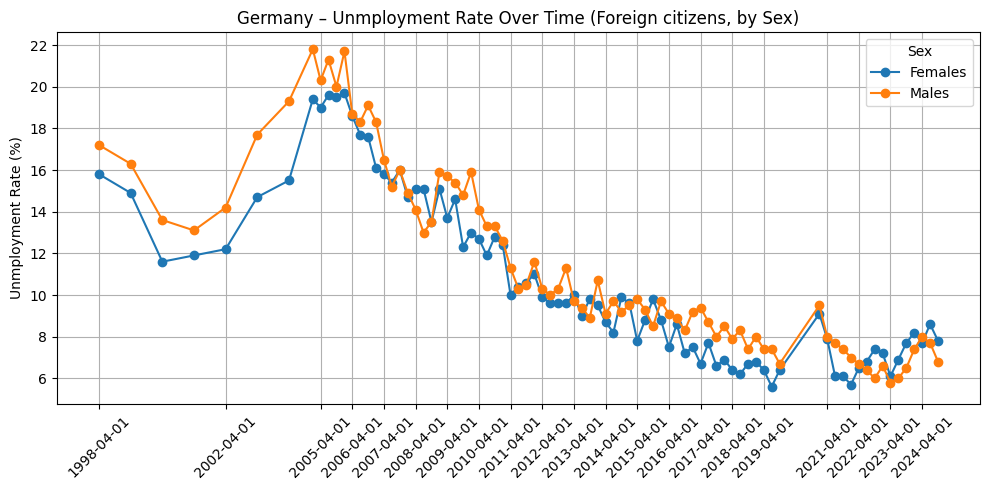

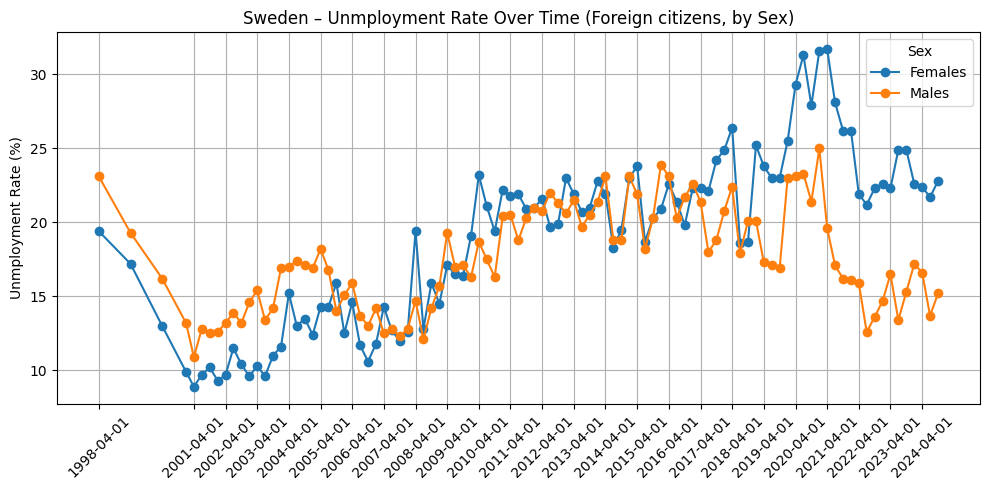

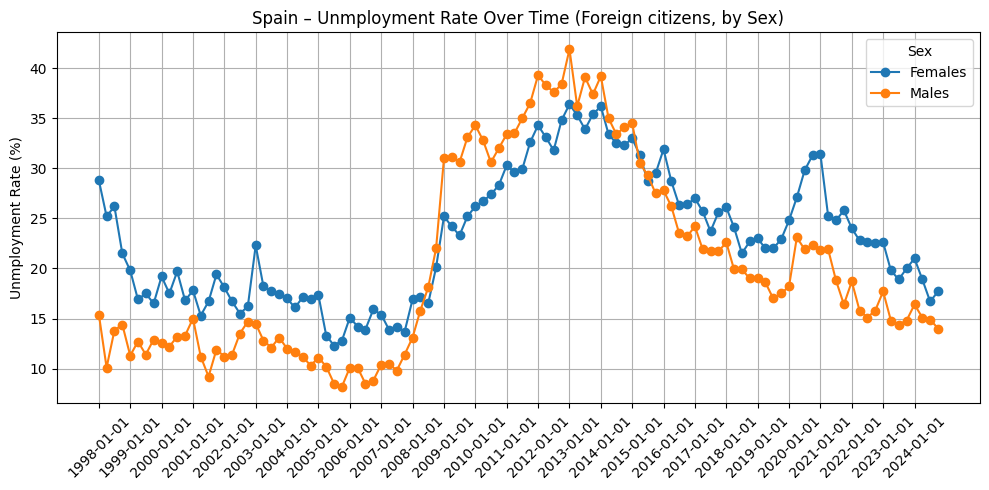

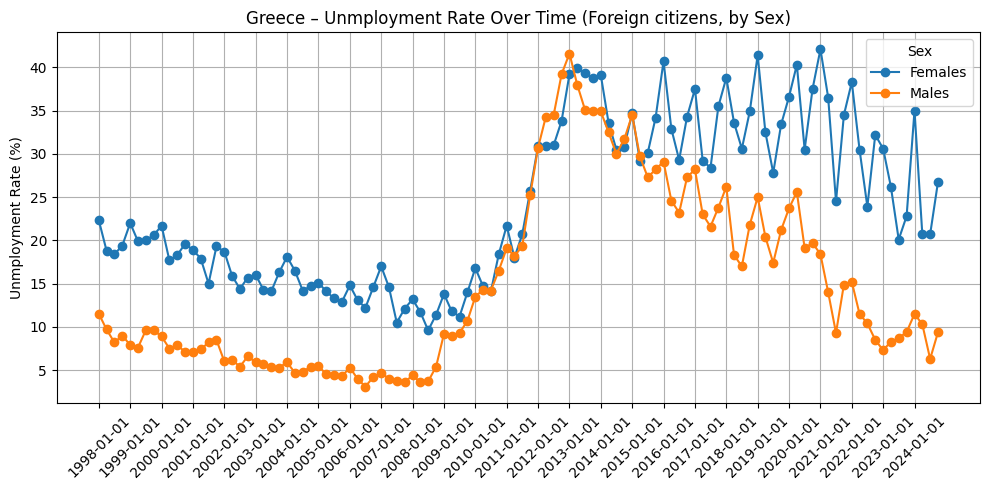

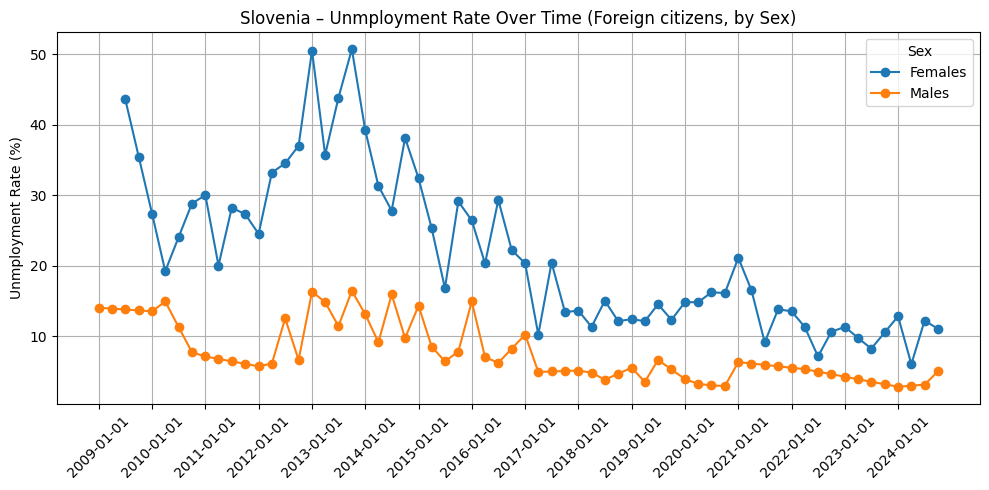

In [69]:
selected_countries = ["Poland", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]


df = ue_rate_df[
    (ue_rate_df['geo'].isin(selected_countries)) &
    (ue_rate_df['Sex'].isin(['Females', 'Males'])) &
    (ue_rate_df['citizenship'] == 'Foreign country')
].copy()

def quarter_to_datetime(q):
    year, qtr = q[:4], q[-1]
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}.get(qtr, '01')
    return pd.to_datetime(f"{year}-{month}-01")

df['quarter_dt'] = df['quarter'].apply(quarter_to_datetime)

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values('quarter_dt')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter_dt'], sex_data['unemployment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Unmployment Rate Over Time (Foreign citizens, by Sex)")
    plt.ylabel("Unmployment Rate (%)")

    xticks = subset['quarter_dt'].unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


# Employment by citizenship

Employment by citizenship per thousand people

In [70]:
emp_cit_df = pd.read_csv('../processed_data/employment_by_citizenship_lfsa_egan.csv')

In [71]:
emp_cit_df.head()

sex                                            citizen      geo  year  \
0  Females  EU27 countries (from 2020) except reporting co...  Austria  2014   
1  Females  EU27 countries (from 2020) except reporting co...  Austria  2015   
2  Females  EU27 countries (from 2020) except reporting co...  Austria  2016   
3  Females  EU27 countries (from 2020) except reporting co...  Austria  2017   
4  Females  EU27 countries (from 2020) except reporting co...  Austria  2018   

   Number per 1000 people  
0                   149.5  
1                   154.5  
2                   170.6  
3                   179.3  
4                   189.1

### Analiza dla cudzoziemców w wybranych krajach

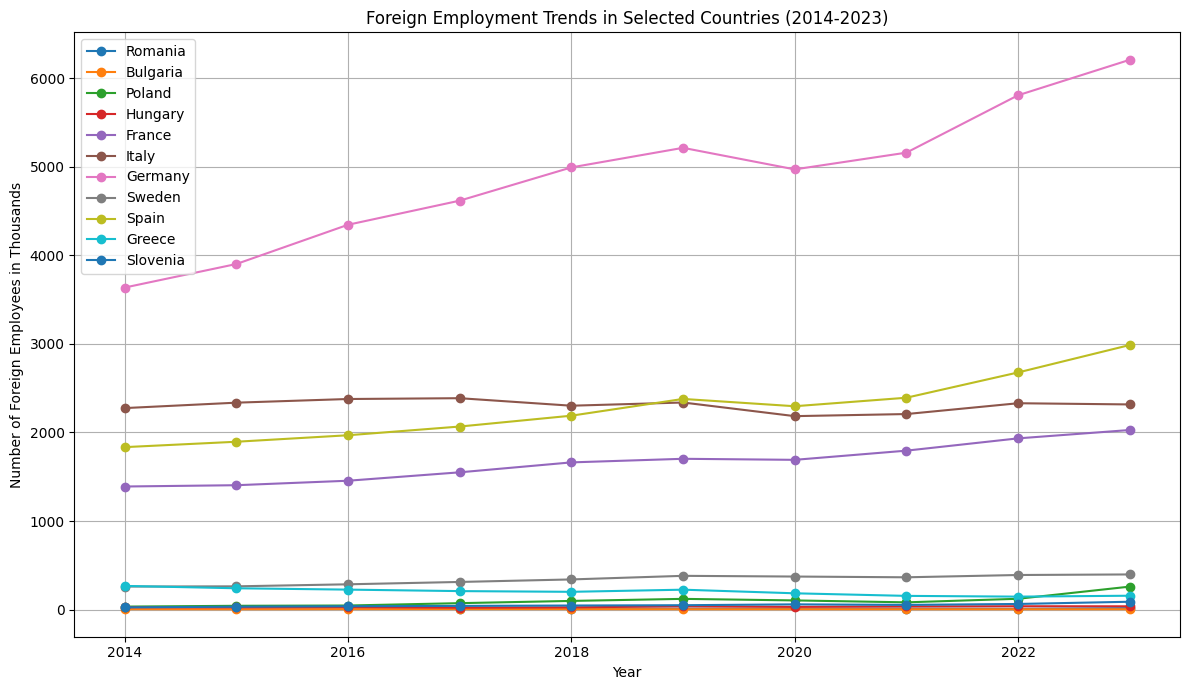

In [72]:
selected_countries = ["Romania", "Bulgaria", "Poland", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]

foreign_employment = emp_cit_df[
    (emp_cit_df['citizen'] == 'Foreign country') & 
    (emp_cit_df['geo'].isin(selected_countries))
]

plt.figure(figsize=(12, 7))
for country in selected_countries:
    data = foreign_employment[(foreign_employment['geo'] == country) & (foreign_employment['sex'] == "Total")]
    plt.plot(data['year'], data['Number per 1000 people'], marker='o', label=country)

plt.title('Foreign Employment Trends in Selected Countries (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Foreign Employees in Thousands')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

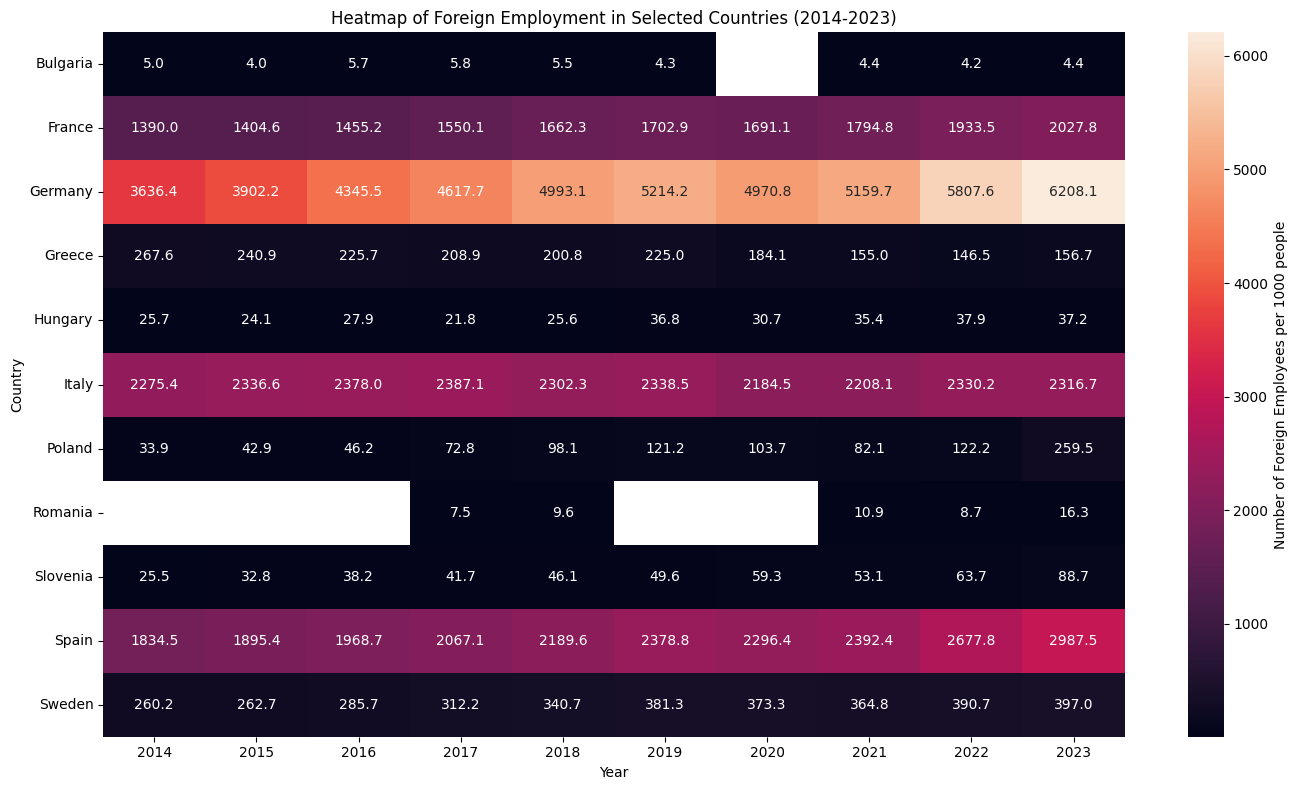

In [74]:
foreign_employment = emp_cit_df[
    (emp_cit_df['citizen'] == 'Foreign country') & 
    (emp_cit_df['geo'].isin(selected_countries)) &
    (emp_cit_df['sex'] == "Total")
]

heatmap_data = foreign_employment.pivot(index='geo', columns='year', values='Number per 1000 people')


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f",  cbar_kws={'label': 'Number of Foreign Employees per 1000 people'})

plt.title('Heatmap of Foreign Employment in Selected Countries (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


### Trendy czasowe

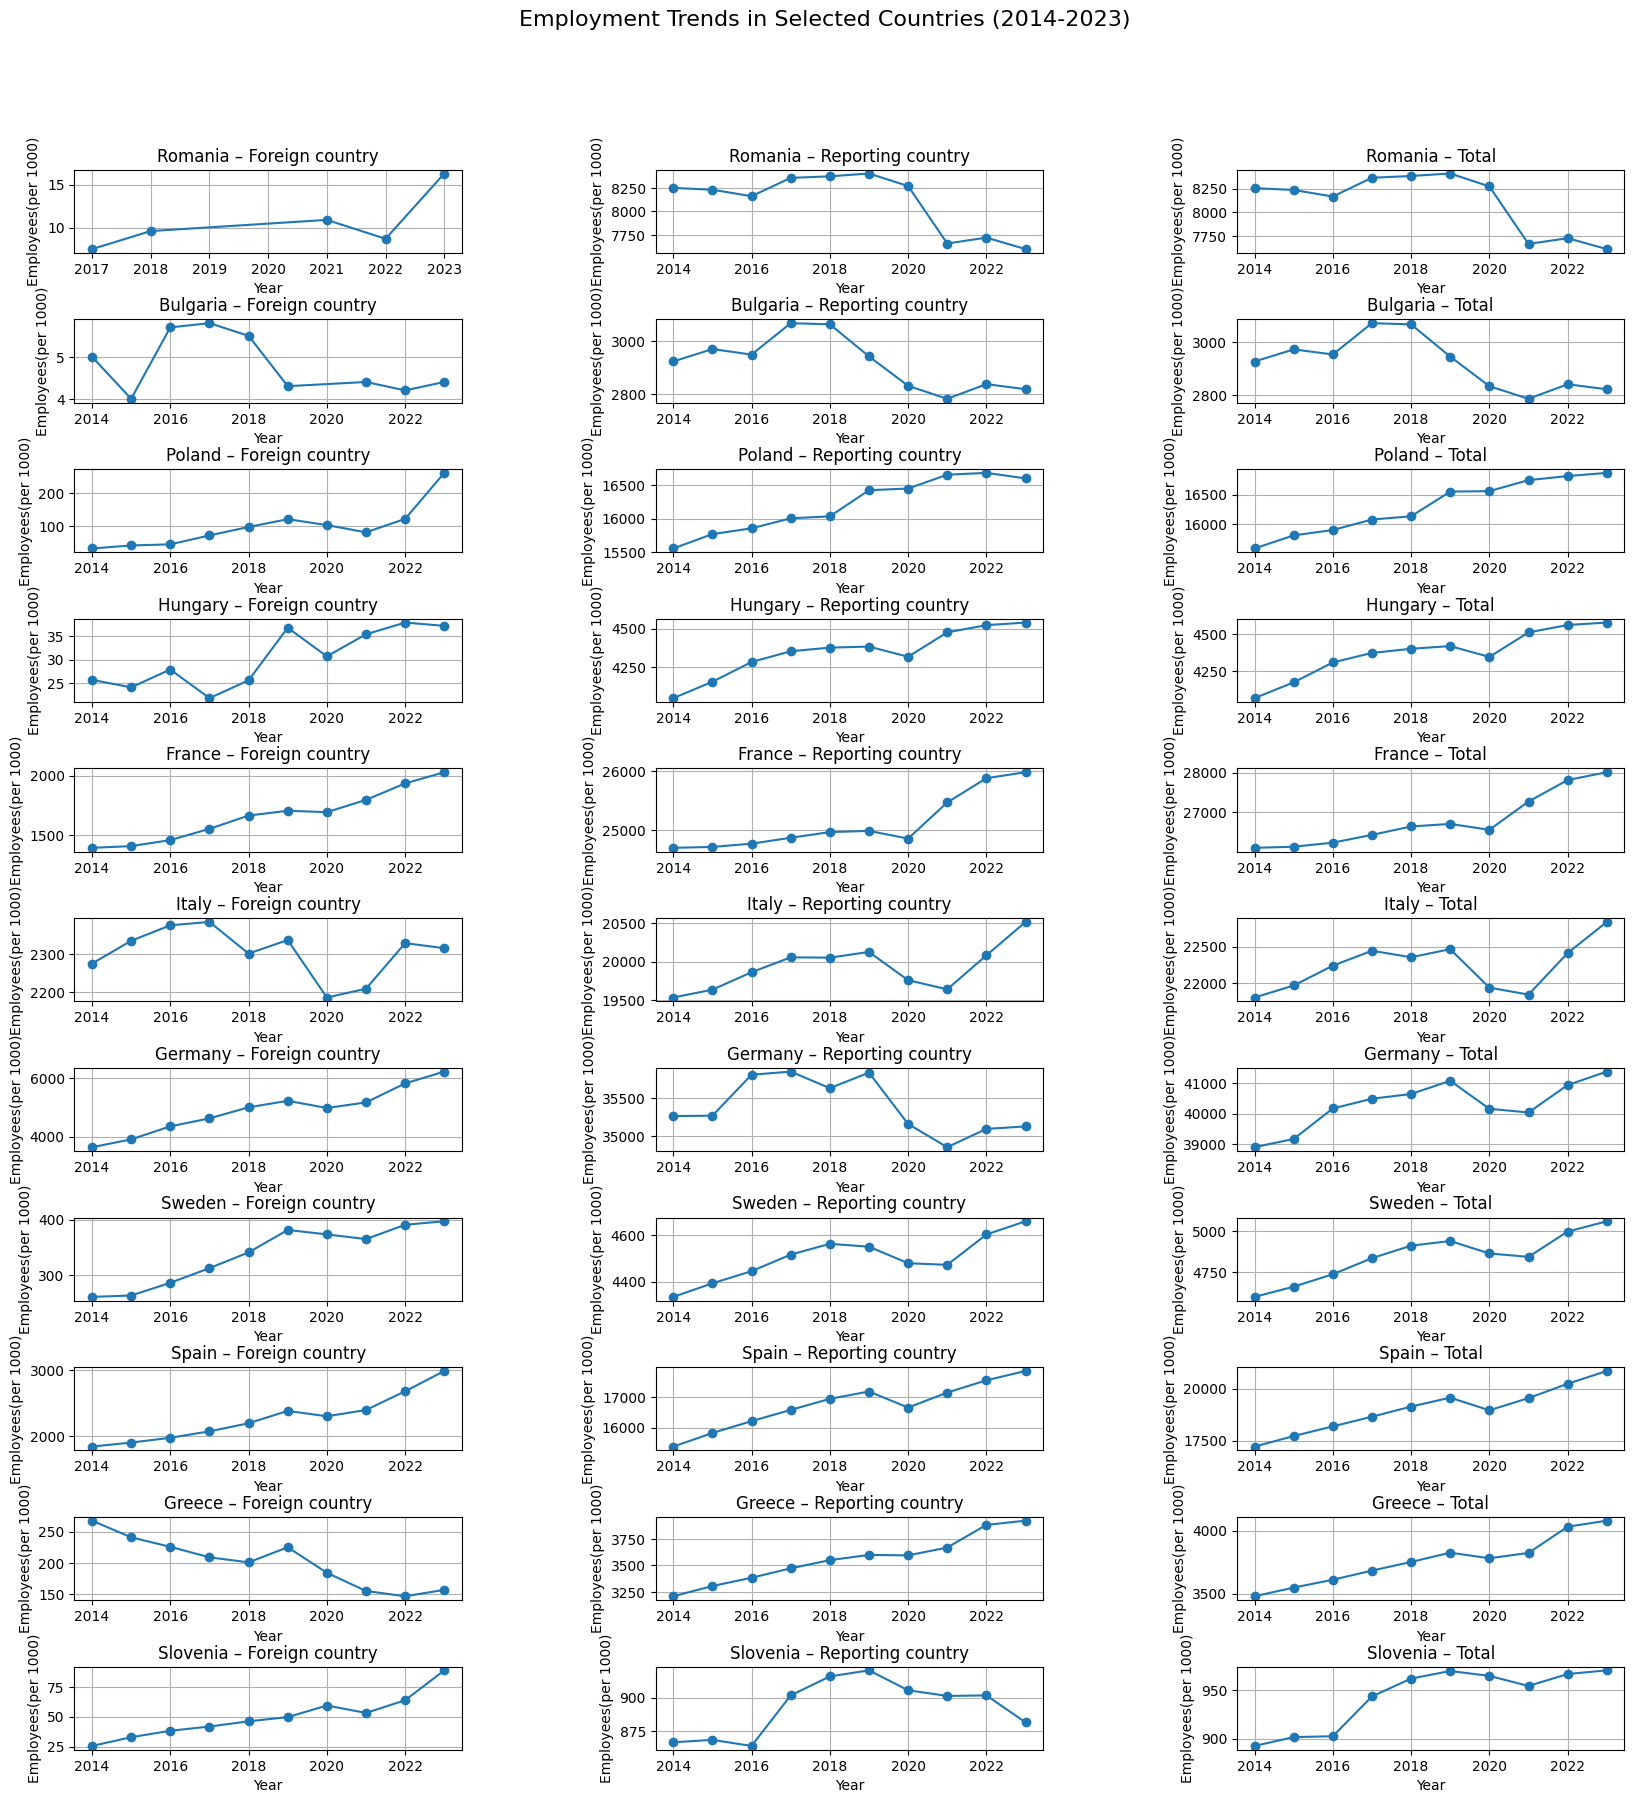

In [76]:
# subplots for each contry - Foreign vs Nationals vs Total trends
fig, axs = plt.subplots(len(selected_countries), 3)

fig.suptitle('Employment Trends in Selected Countries (2014-2023)', fontsize=16)
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(hspace=0.8)
fig.subplots_adjust(wspace=0.5)
fig.set_size_inches(20, 20)

for country in selected_countries:
    data = emp_cit_df[(emp_cit_df['geo'] == country) & (emp_cit_df['sex'] == 'Total')]
    
    for i, citizenship in enumerate(['Foreign country', 'Reporting country', 'Total']):
        subset = data[data['citizen'] == citizenship]
        axs[selected_countries.index(country), i].plot(subset['year'], subset['Number per 1000 people'], marker='o')
        axs[selected_countries.index(country), i].set_title(f'{country} – {citizenship}')
        axs[selected_countries.index(country), i].set_xlabel('Year')
        axs[selected_countries.index(country), i].set_ylabel('Employees(per 1000)')
        axs[selected_countries.index(country), i].grid(True)

# Employment rates by sex and citizenship yearly

In [5]:
emp_an = pd.read_csv('../processed_data/employmnet_rates_yearly.csv')

In [7]:
emp_an.tail()

citizenship             geo  employment_rate  year    Sex
7978       Total  United Kingdom             72.7  2015  Total
7979       Total  United Kingdom             73.5  2016  Total
7980       Total  United Kingdom             74.1  2017  Total
7981       Total  United Kingdom             74.7  2018  Total
7982       Total  United Kingdom             75.2  2019  Total

In [9]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain"]
df = emp_an[emp_an['geo'].isin(selected_countries)]

### Taka sama analiza jak dla danych kwartalnych

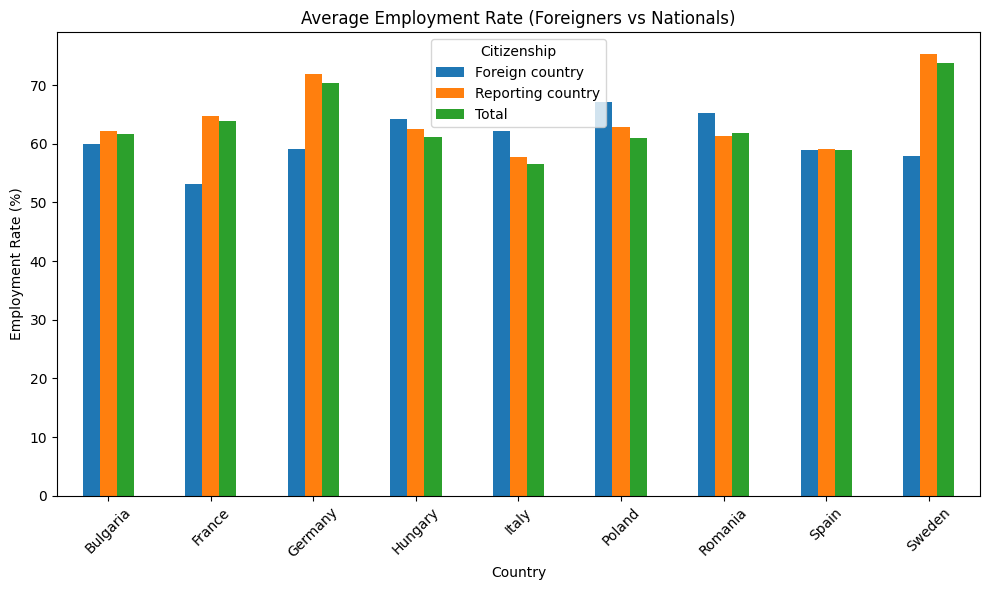

<Figure size 1200x600 with 0 Axes>

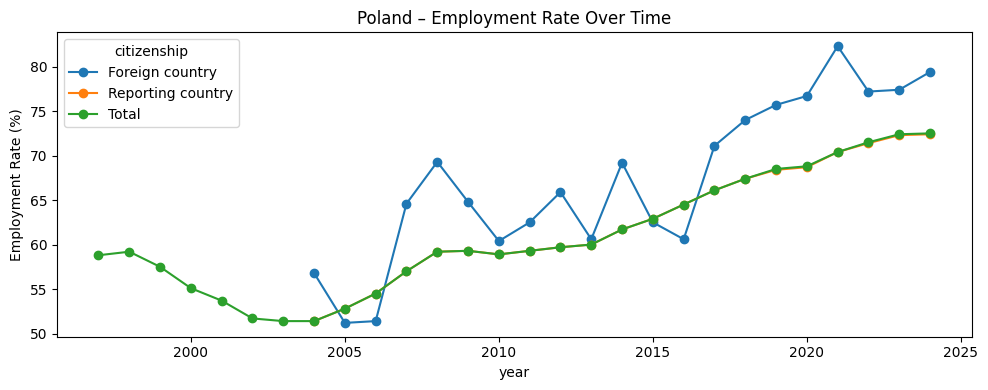

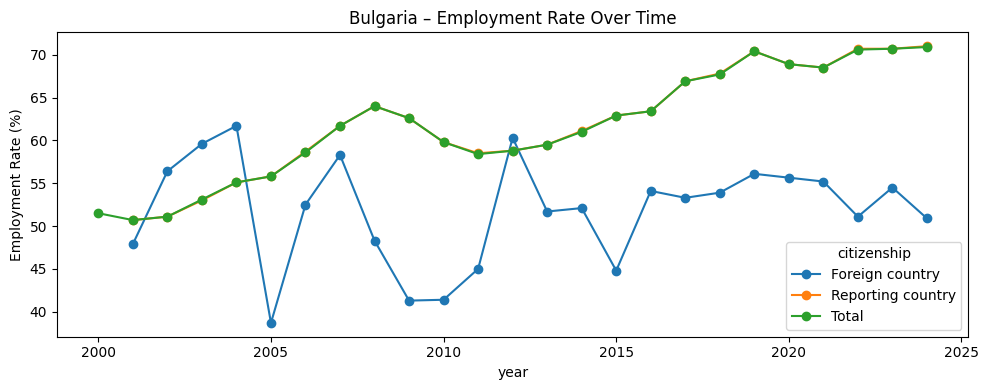

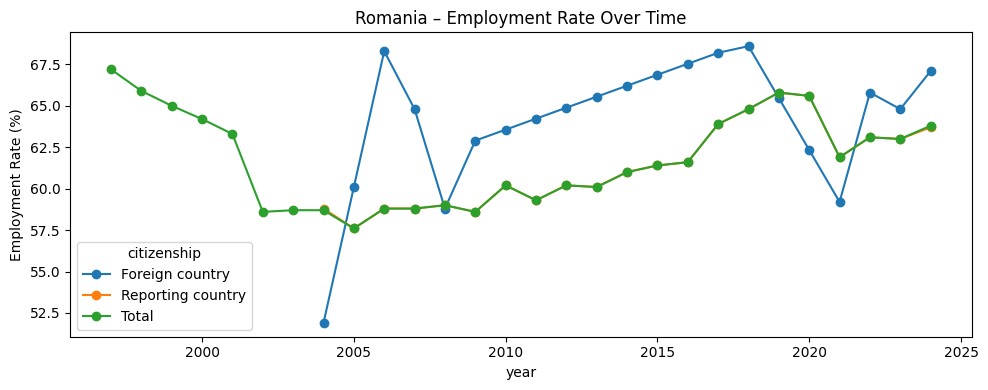

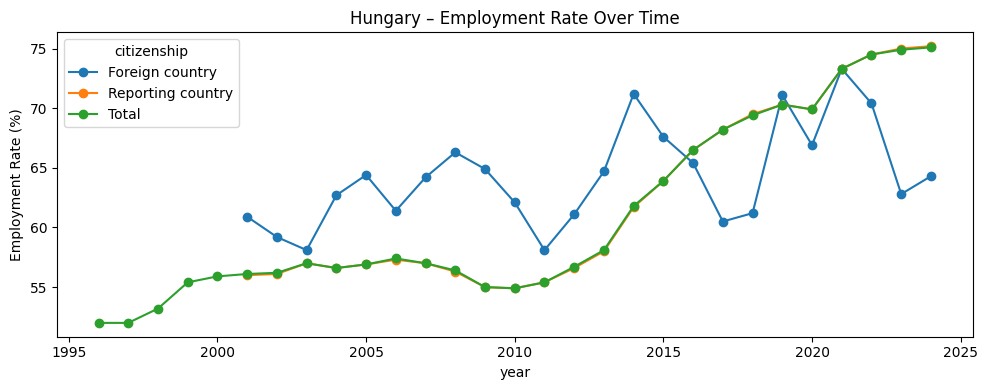

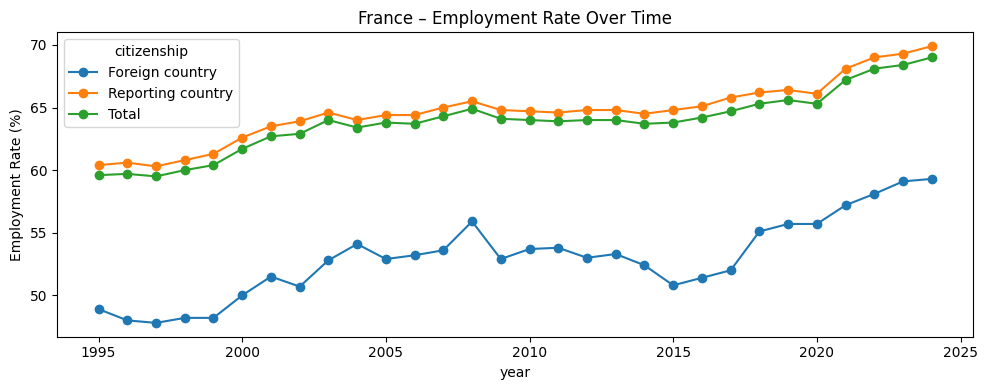

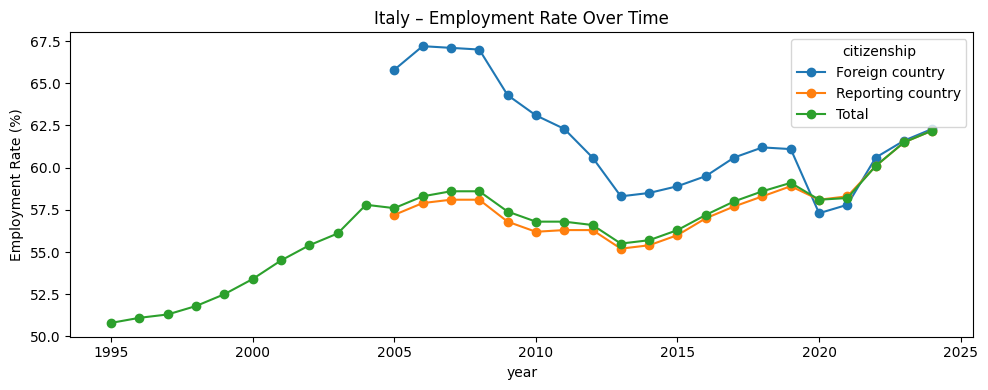

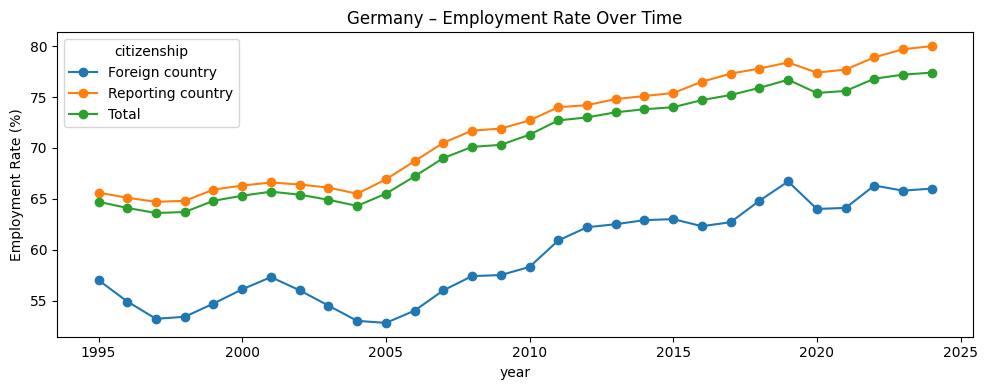

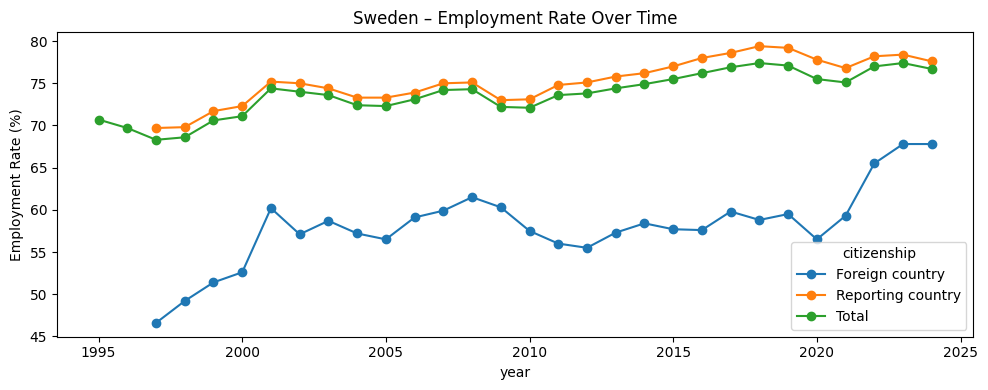

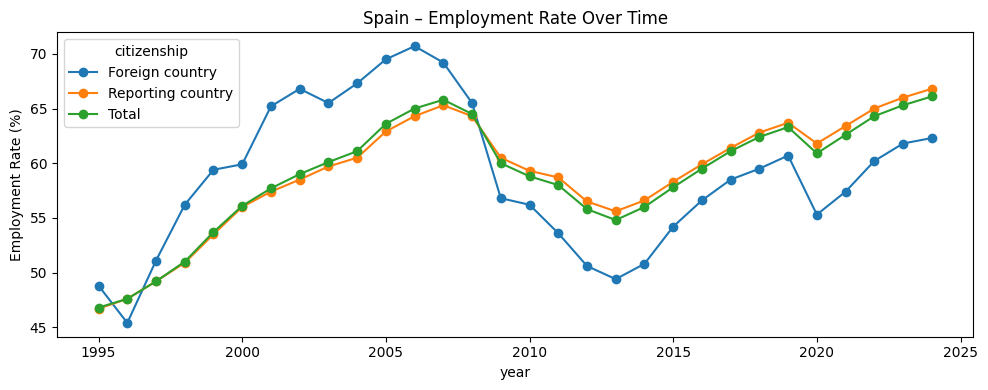

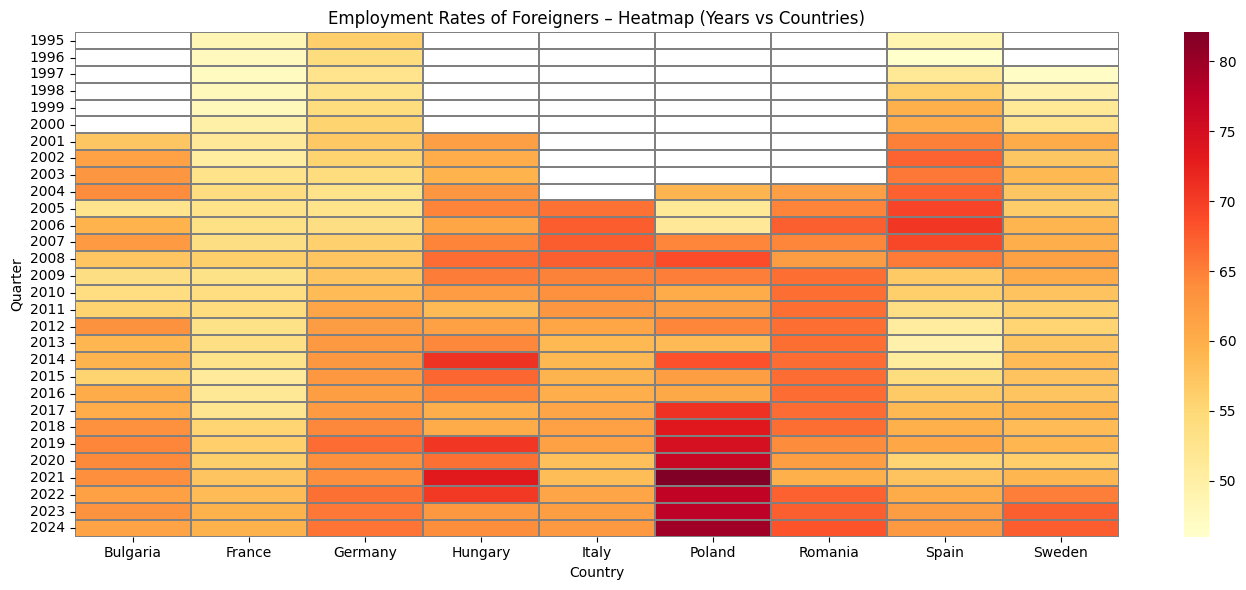

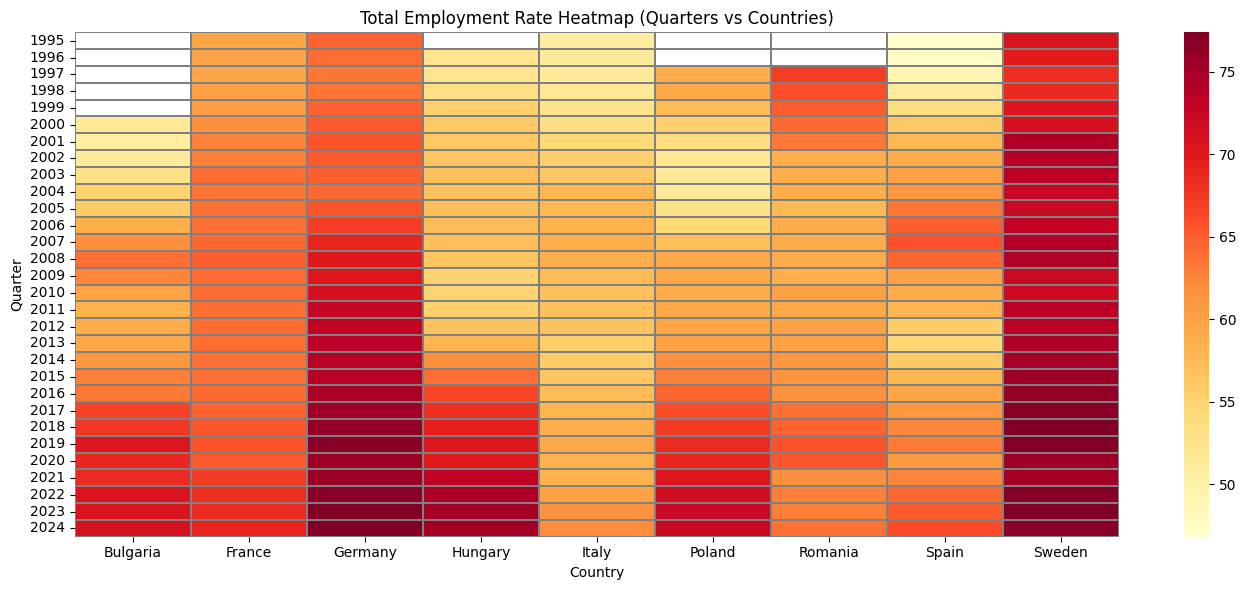

In [14]:
# Average employment rate by citizenship and country
pivot_mean = df.groupby(['geo', 'citizenship'])['employment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Employment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in selected_countries:
    subset = df[(df['geo'] == country) & (df['citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='year', columns='citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4), marker='o')
    plt.ylabel("Employment Rate (%)")
    plt.tight_layout()
    plt.show()

# Heatmap of foreigner employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Foreign country'].pivot_table(index='year', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Employment Rates of Foreigners – Heatmap (Years vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


# Heatmap of total employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Total'].pivot_table(index='year', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Total Employment Rate Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


### Analizy związane z płcią - Total

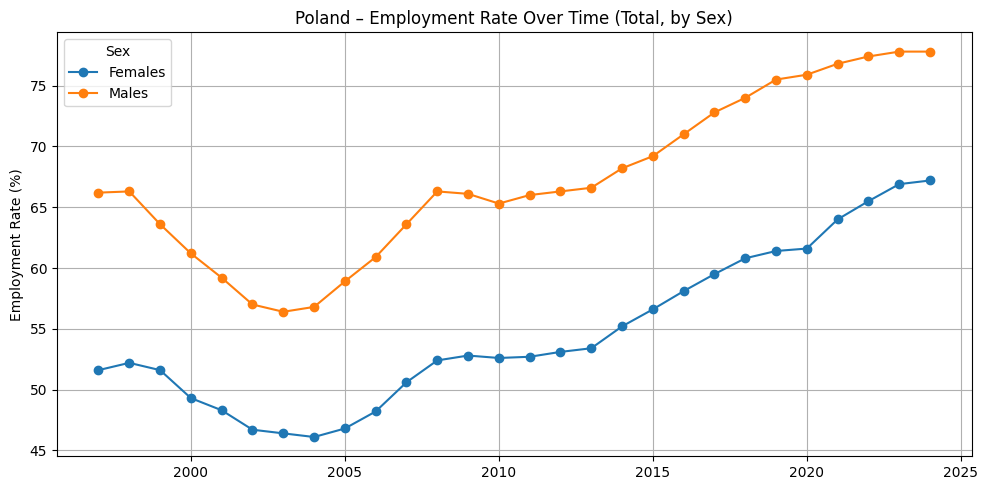

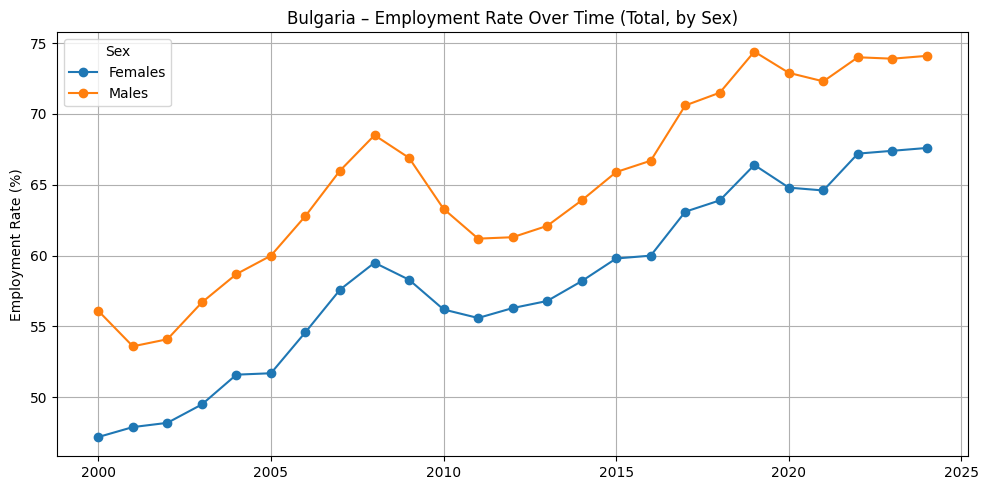

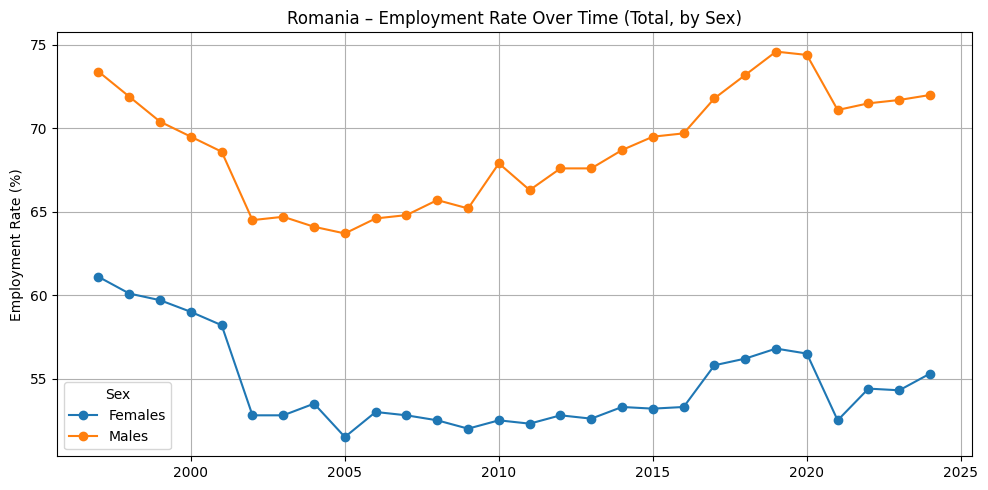

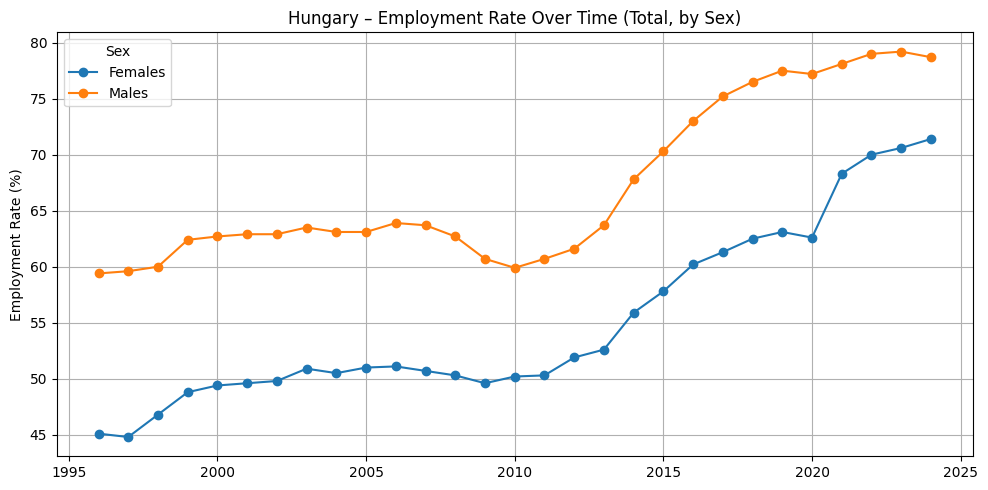

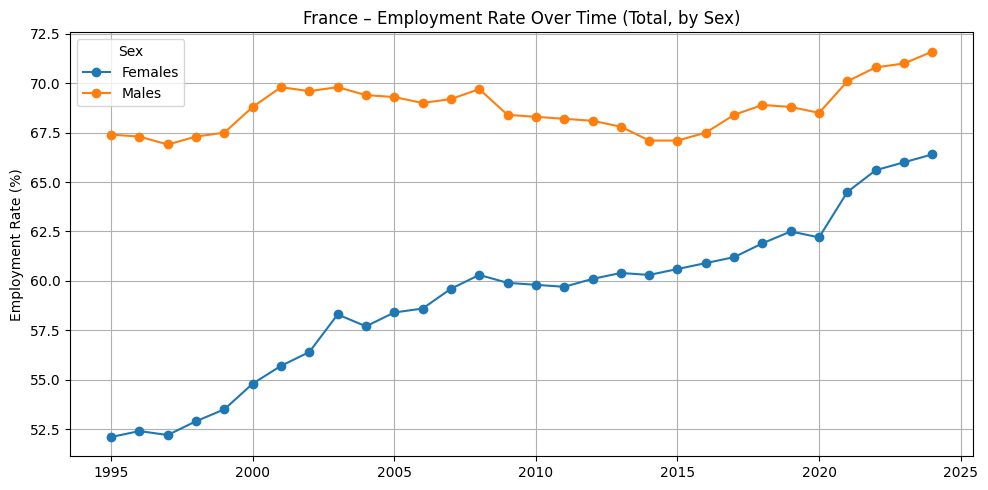

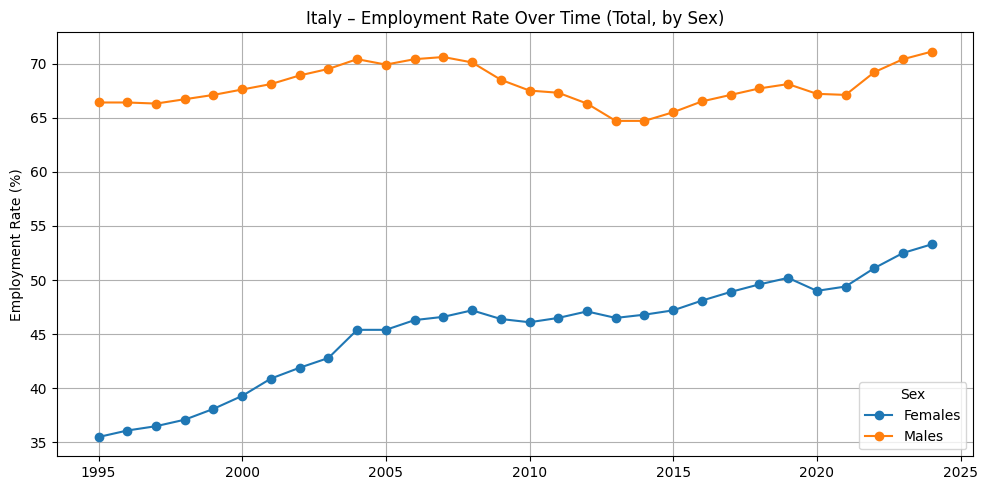

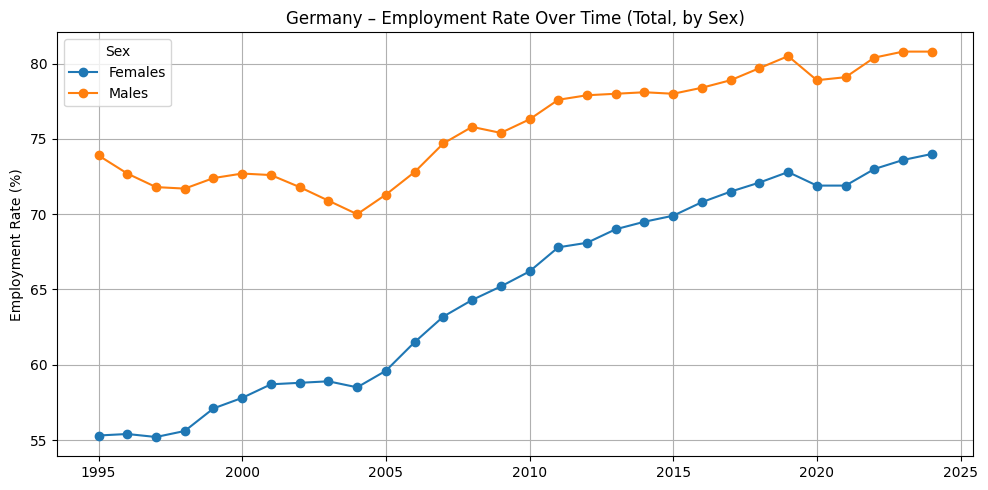

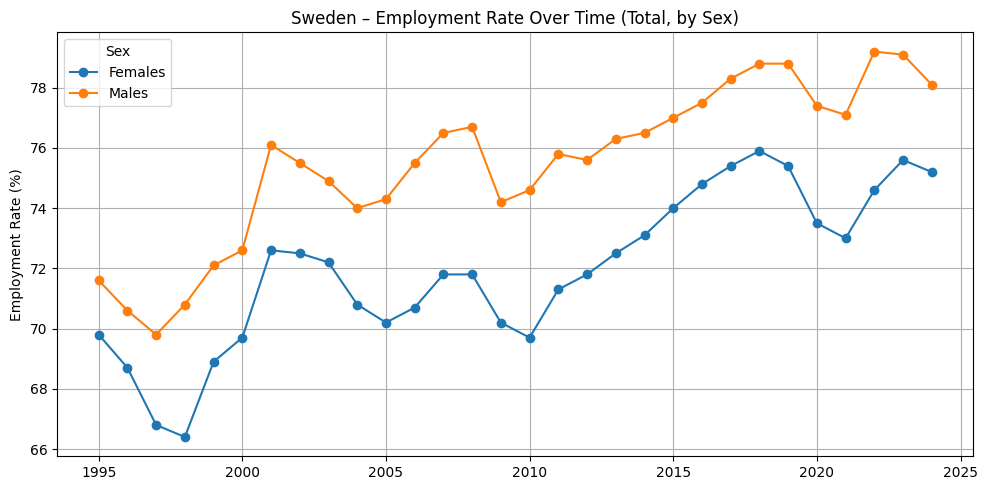

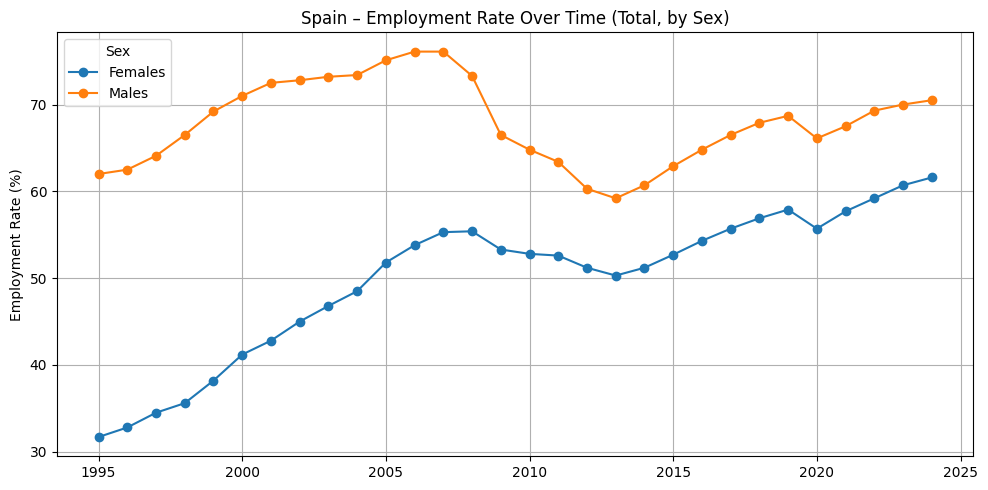

In [20]:
df = emp_an[
    (emp_an ['geo'].isin(selected_countries)) &
    (emp_an ['Sex'].isin(['Females', 'Males'])) &
    (emp_an ['citizenship'] == 'Total')
]

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values(by='year')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['year'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Total, by Sex)")
    plt.ylabel("Employment Rate (%)")

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()

### Analizy związane z płcią - Foreign country

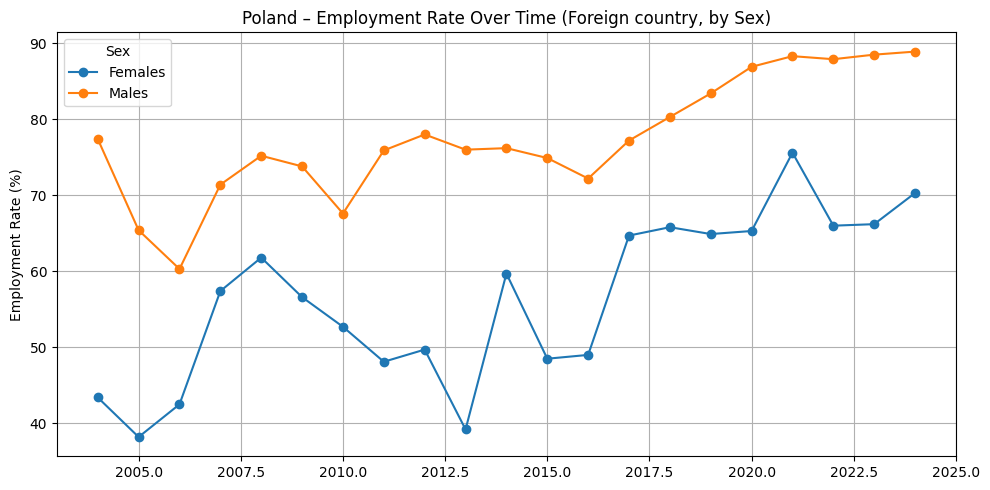

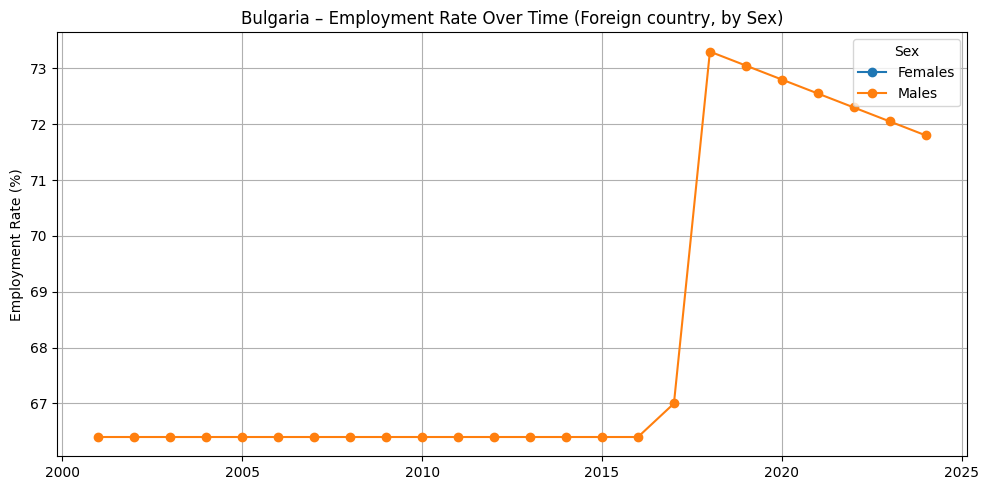

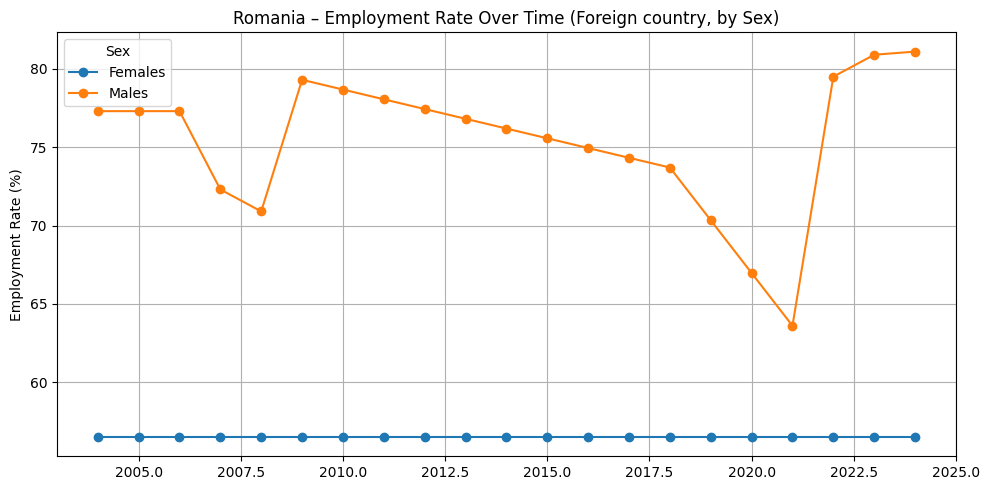

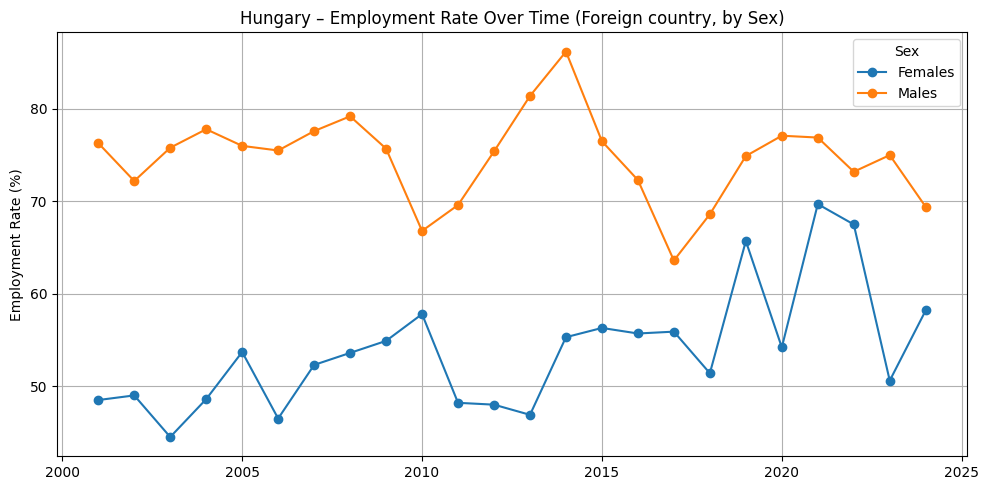

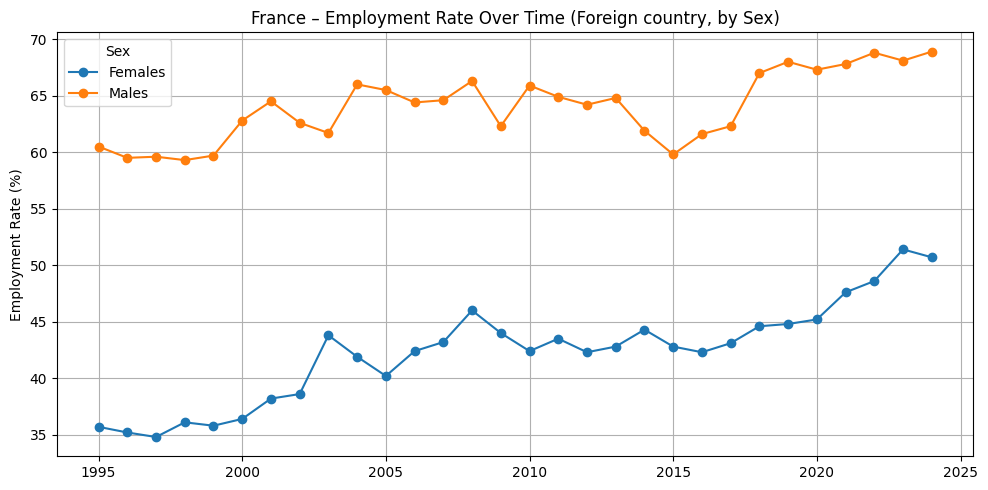

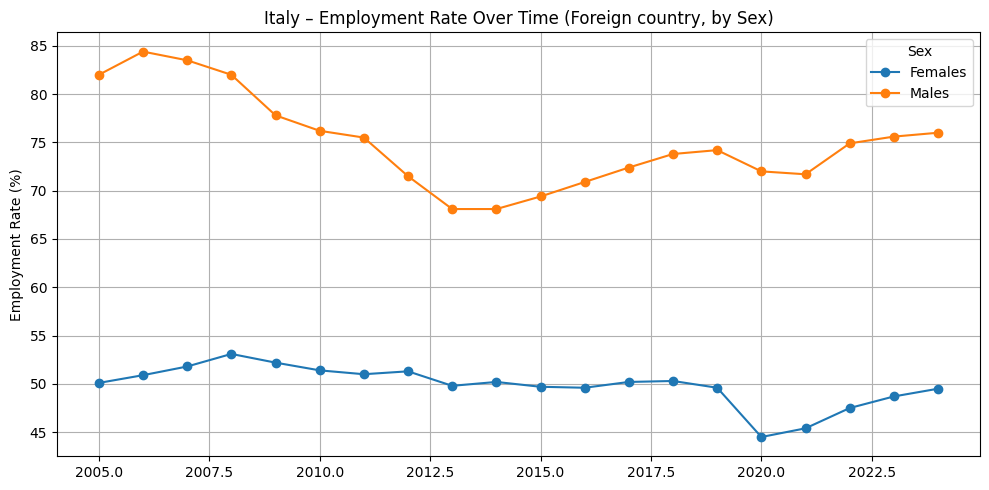

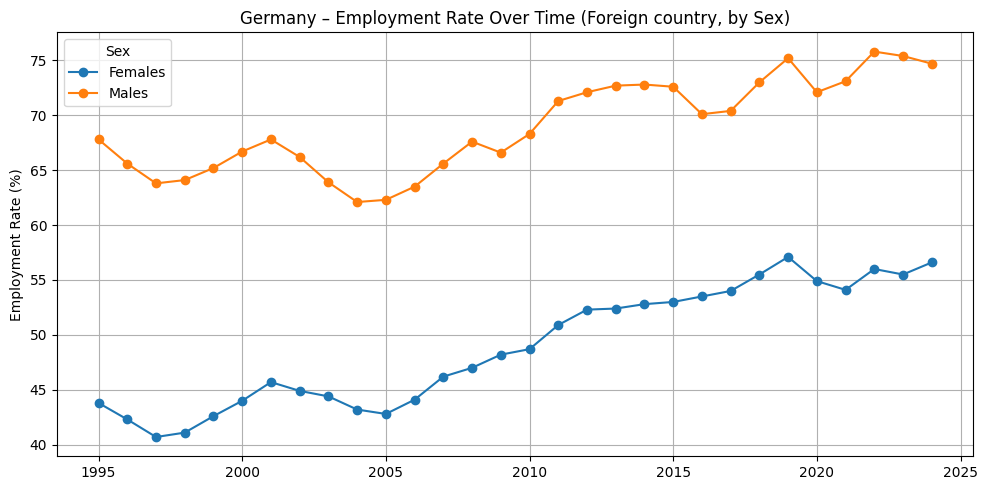

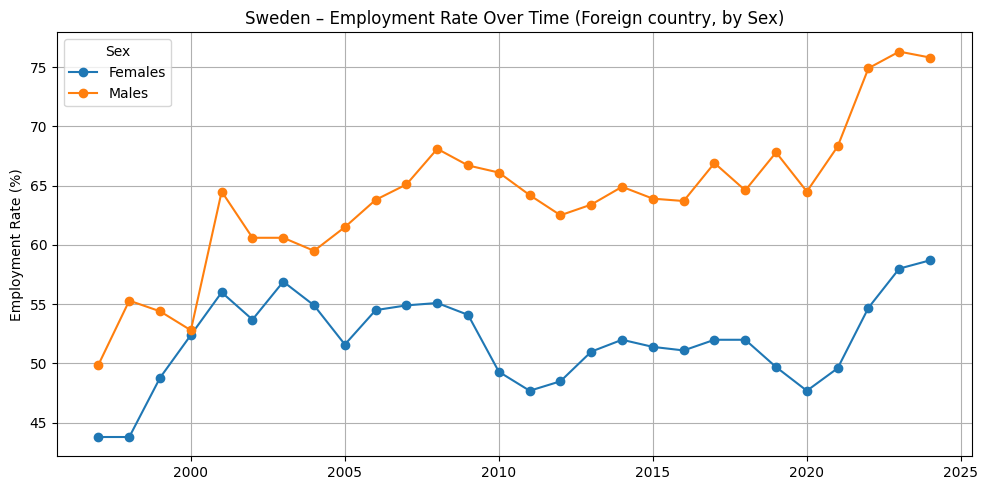

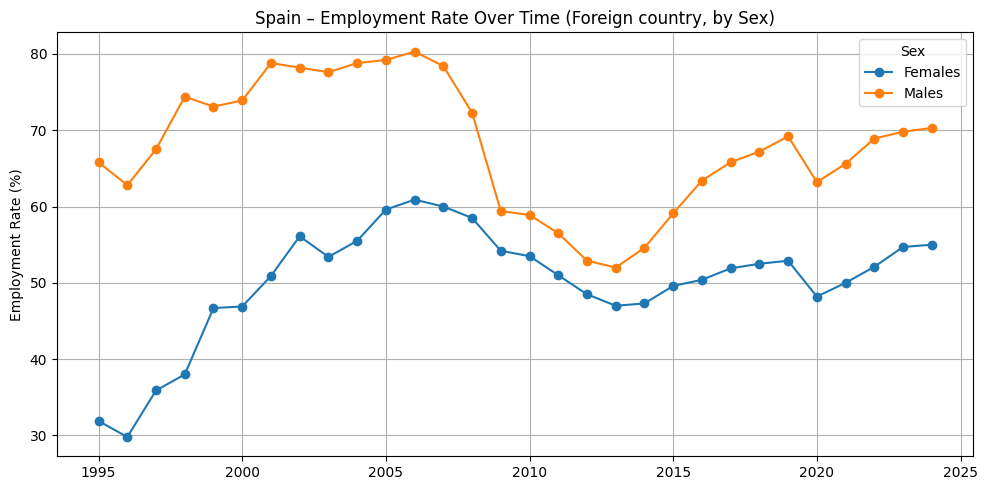

In [21]:
df = emp_an[
    (emp_an ['geo'].isin(selected_countries)) &
    (emp_an ['Sex'].isin(['Females', 'Males'])) &
    (emp_an ['citizenship'] == 'Foreign country')
]

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values(by='year')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['year'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Foreign country, by Sex)")
    plt.ylabel("Employment Rate (%)")

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()